# How to use ML to time series

## Introduction


In [62]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import datetime
from pandas import Series
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from fnmatch import fnmatch
from matplotlib.patches import Patch
cmap_cv = plt.cm.coolwarm

/tmp/ipykernel_27891/2468276157.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
series_row = pd.read_csv('./daily-minimum-temperatures.csv', header=0)
series_row.head()

Date  Daily minimum temperatures in Melbourne, Australia, 1981-1990
0  1981-01-01                                               20.7            
1  1981-01-02                                               17.9            
2  1981-01-03                                               18.8            
3  1981-01-04                                               14.6            
4  1981-01-05                                               15.8

In [3]:
series_row = series_row.iloc[:,1]

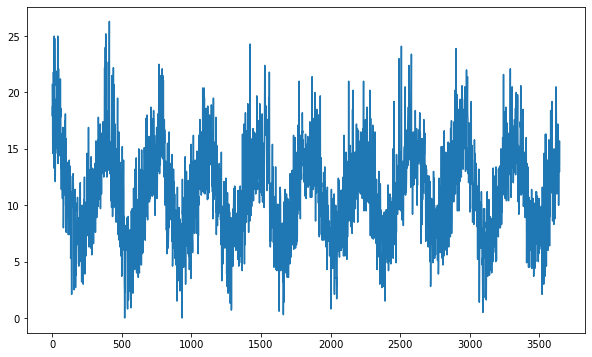

In [4]:
plt.figure(figsize=(10,6));
series_row.plot()
plt.show()

In [5]:
series = series_row.values

In [6]:
import statsmodels.api as sm

In [7]:
resultsAR=[]
for order in range(1,21):
    model = sm.tsa.ARMA(series, (order,0))
    resultsAR.append(model.fit())

bic_criteria = [result.bic for result in resultsAR]

/home/marsob/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.36426D+00    |proj g|=  4.78018D-04

At iterate    5    f=  2.36426D+00    |proj g|=  4.92939D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     12      1     0     0   0.000D+00   2.364D+00
  F =   2.3642615957884061     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 v

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     15      1     0     0   4.441D-08   2.331D+00
  F =   2.3308487478927127     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.32218D+00    |proj g|=  3.76765D-04

At iterate    5    f=  2.32218D+00    |proj g|=  1.29452D-04


 This problem is unconstrained.



At iterate   10    f=  2.32217D+00    |proj g|=  3.55227D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     16      1     0     0   0.000D+00   2.322D+00
  F =   2.3221734186012561     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.31637D+00    |proj g|=  3.67084D-04


 This problem is unconstrained.



At iterate    5    f=  2.31637D+00    |proj g|=  1.28297D-04

At iterate   10    f=  2.31637D+00    |proj g|=  4.51017D-04

At iterate   15    f=  2.31637D+00    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     15     18      1     0     0   1.332D-07   2.316D+00
  F =   2.3163668695379505     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.31100D+00    |proj g|=  3.64153D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  2.31099D+00    |proj g|=  2.62057D-04

At iterate   15    f=  2.31099D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     18      1     0     0   4.441D-08   2.311D+00
  F =   2.3109856603520815     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30810D+00    |proj g|=  3.88622D-04

At iterate    5    f=  2.30810D+00    |proj g|=  1.35314D-04

At iterate   10    f=  2.30809D+00    |proj g|=  8.09575D-05

At iterate   15    f=  2.30809D+00    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     15     20      1     0     0   1.332D-07   2.308D+00
  F =   2.3080886341286355     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30558D+00    |proj g|=  5.39213D-04

At iterate    5    f=  2.30557D+00    |proj g|=  1.53033D-04

At iterate   10    f=  2.30556D+00    |proj g|=  1.90381D-04

At iterate   15    f=  2.30556D+00    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     16     23      1     0     0   8.882D-08   2.306D+00
  F =   2.3055638871569792     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  2.30485D+00    |proj g|=  1.55387D-04

At iterate   10    f=  2.30484D+00    |proj g|=  2.78266D-04

At iterate   15    f=  2.30484D+00    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     17     23      1     0     0   0.000D+00   2.305D+00
  F =   2.3048419141859471     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30372D+00    |proj g|=  5.00266D-04


 This problem is unconstrained.



At iterate    5    f=  2.30371D+00    |proj g|=  1.63425D-04

At iterate   10    f=  2.30370D+00    |proj g|=  7.24709D-04

At iterate   15    f=  2.30370D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     18     22      1     0     0   4.441D-08   2.304D+00
  F =   2.3036955244248398     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30204D+00    |proj g|=  5.31131D-04

At iterate    5    f=  2.30203D+00    |proj g|=  1.57030D-04

At iterate   10    f=  2.30202D+00    |proj g|=  4.07274D-04

At iterate   15    f=  2.30202D+00    |proj g|=  4.44089D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     19     25      1     0     0   2.220D-07   2.302D+00
  F =   2.3020201294803875     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30067D+00    |proj g|=  5.24647D-04

At iterate    5    f=  2.30066D+00    |proj g|=  3.21787D-04

At iterate   10    f=  2.30065D+00    |proj g|=  7.82041D-04

At iterate   15    f=  2.30065D+00    |proj g|=  4.44089D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     18     22      1     0     0   4.441D-08   2.301D+00
  F =   2.3006479747349191     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29998D+00    |proj g|=  9.09051D-04

At iterate    5    f=  2.29996D+00    |proj g|=  3.48477D-04

At iterate   10    f=  2.29995D+00    |proj g|=  6.15019D-04

At iterate   15    f=  2.29995D+00    |proj g|=  6.83897D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     19     24      1     0     0   8.882D-08   2.300D+00
  F =   2.2999460908704794     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29874D+00    |proj g|=  1.06404D-03

At iterate    5    f=  2.29871D+00    |proj g|=  6.55920D-04

At iterate   10    f=  2.29870D+00    |proj g|=  6.73284D-04

At iterate   15    f=  2.29869D+00    |proj g|=  4.62297D-05

At iterate   20    f=  2.29869D+00    |proj g|=  3.10862D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     22     25      1     0     0   4.441D-08   2.299D+00
  F =   2.2986864885854441     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  2.29812D+00    |proj g|=  5.93658D-04

At iterate   10    f=  2.29812D+00    |proj g|=  5.69900D-04

At iterate   15    f=  2.29810D+00    |proj g|=  1.16307D-04

At iterate   20    f=  2.29810D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     23     27      1     0     0   4.441D-08   2.298D+00
  F =   2.2980967107310950     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           12

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.29725D+00    |proj g|=  3.78719D-04

At iterate   10    f=  2.29724D+00    |proj g|=  8.39151D-04

At iterate   15    f=  2.29722D+00    |proj g|=  2.51799D-05

At iterate   20    f=  2.29722D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     21     27      1     0     0   4.441D-08   2.297D+00
  F =   2.2972213914116599     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           12

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.29629D+00    |proj g|=  1.86695D-04

At iterate   10    f=  2.29628D+00    |proj g|=  7.11209D-04

At iterate   15    f=  2.29626D+00    |proj g|=  2.34479D-05

At iterate   20    f=  2.29626D+00    |proj g|=  1.59872D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19     24     30      1     0     0   4.441D-08   2.296D+00
  F =   2.2962582159369140     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           12

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.29618D+00    |proj g|=  8.39462D-04

At iterate   10    f=  2.29617D+00    |proj g|=  6.33849D-04

At iterate   15    f=  2.29614D+00    |proj g|=  2.45493D-04

At iterate   20    f=  2.29614D+00    |proj g|=  1.73195D-06

At iterate   25    f=  2.29614D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20     25     30      1     0     0   8.882D-08   2.296D+00
  F =   2.2961443040831586     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29525D+00    |proj g|=  8.94484D-04

At iterate    5    f=  2.29520D+00    |proj g|=  5.48050D-04

At iterate   10    f=  2.29520D+00    |proj g|=  3.68949D-04

At iterate   15    f=  2.29517D+00    |proj g|=  3.50076D-04

At iterate   20    f=  2.29517D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     22     25      1     0     0   4.441D-08   2.295D+00
  F =   2.2951675194298171     

CONVERG

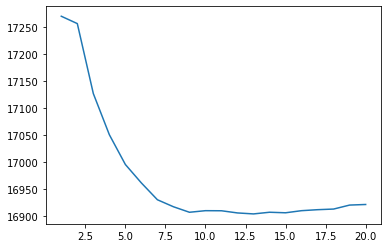

In [8]:
plt.plot(range(1,len(bic_criteria)+1),bic_criteria)

In [9]:
orderOfModel = np.argmin(bic_criteria)+1
orderOfModel

13

In [10]:
# as the nature of case studied is known, and natural period for `daily-minimum-temperatures`
# in monthly scale is equal 12, so instead od 13 for 'orderOfModel' I use 12
orderOfModel = 12

In [11]:
# to compare the prediction results for different time series, the series is normalized 
series -= series.mean()
series /= np.std(series)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
series_train, series_test = train_test_split(series, test_size=0.20, random_state=42, shuffle=False)

In [14]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [15]:
df_train = pd.DataFrame()
df_train['t'] = [x for x in series_train]
dataframe_train = series_to_supervised(df_train, orderOfModel)
dataframe_train.head()

var1(t-12)  var1(t-11)  var1(t-10)  var1(t-9)  var1(t-8)  var1(t-7)  \
12    2.342548    1.653082    1.874696   0.840497   1.135982   1.135982   
13    1.653082    1.874696    0.840497   1.135982   1.135982   1.135982   
14    1.874696    0.840497    1.135982   1.135982   1.135982   1.529963   
15    0.840497    1.135982    1.135982   1.135982   1.529963   2.613409   
16    1.135982    1.135982    1.135982   1.529963   2.613409   2.170181   

    var1(t-6)  var1(t-5)  var1(t-4)  var1(t-3)  var1(t-2)  var1(t-1)   var1(t)  
12   1.135982   1.529963   2.613409   2.170181   1.234477   0.520388  1.357596  
13   1.529963   2.613409   2.170181   1.234477   0.520388   1.357596  2.539538  
14   2.613409   2.170181   1.234477   0.520388   1.357596   2.539538  3.401371  
15   2.170181   1.234477   0.520388   1.357596   2.539538   3.401371  2.342548  
16   1.234477   0.520388   1.357596   2.539538   3.401371   2.342548  2.317924

In [16]:
df_test = pd.DataFrame()
df_test['t'] = [x for x in series_test]
dataframe_test = series_to_supervised(df_test, orderOfModel)
dataframe_test.head()

var1(t-12)  var1(t-11)  var1(t-10)  var1(t-9)  var1(t-8)  var1(t-7)  \
12    0.766625    1.529963    1.800825   1.382220   0.077159  -0.415316   
13    1.529963    1.800825    1.382220   0.077159  -0.415316   0.249526   
14    1.800825    1.382220    0.077159  -0.415316   0.249526   1.111359   
15    1.382220    0.077159   -0.415316   0.249526   1.111359   1.259101   
16    0.077159   -0.415316    0.249526   1.111359   1.259101   0.594259   

    var1(t-6)  var1(t-5)  var1(t-4)  var1(t-3)  var1(t-2)  var1(t-1)   var1(t)  
12   0.249526   1.111359   1.259101   0.594259   0.348021   0.643507  0.224902  
13   1.111359   1.259101   0.594259   0.348021   0.643507   0.224902  0.545011  
14   1.259101   0.594259   0.348021   0.643507   0.224902   0.545011  1.505339  
15   0.594259   0.348021   0.643507   0.224902   0.545011   1.505339  2.022439  
16   0.348021   0.643507   0.224902   0.545011   1.505339   2.022439  1.332973

In [17]:
# split into input and output
X_train, y_train = dataframe_train.values[:,:-1], dataframe_train.values[:,-1]
X_test, y_test = dataframe_test.values[:,:-1], dataframe_test.values[:,-1]

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2905, 12), (2905,), (718, 12), (718,))

In [19]:
models={}
grids_ElasticNet, grids_Lasso, grids_Ridge, grids_LinearR, grids_SVR = {}, {}, {}, {}, {}

In [20]:
from sklearn.model_selection import TimeSeriesSplit, KFold

class RollingTimeSeriesSplit():
    
    def __init__(self, n_splits):
        self.n_splits = n_splits
    
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y=None, groups=None):
        n_sample = len(X)
        k_fold_half_size = n_sample // (self.n_splits + 1)
        indices = np.arange(n_sample)
        
        for i in range(self.n_splits):
            start = i * k_fold_half_size
            mid = start + k_fold_half_size
            end = mid + k_fold_half_size
            yield indices[start:mid], indices[mid:end]
        
class PrimitiveFold():
    
    def __init__(self, ratioTrainTest=9):
        self.n_splits = 1
        self.ratioTrainTest = ratioTrainTest
    
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y=None, groups=None):
        n_sample = len(X)
        indices = np.arange(n_sample)
        for i in range(self.n_splits):
            yield indices[:-n_sample // (self.ratioTrainTest + 1)], indices[-n_sample // (self.ratioTrainTest + 1):]
    


In [21]:
kfolds = {'KFold_10':KFold(n_splits=10, shuffle=False), 'TimeSeriesSplit_9':TimeSeriesSplit(n_splits=9),
          'PrimitiveFold_9':PrimitiveFold(ratioTrainTest=9), 'RollingTSS_9' :RollingTimeSeriesSplit(n_splits=9)}

cv_name = list(kfolds.keys())[0]
kfold = kfolds[cv_name] 
print(f'kfold type used to find a reasonable set of hiperparameters : {cv_name}')


scoring = {'MSE': 'neg_mean_squared_error', 'RMSE': 'neg_root_mean_squared_error'}

In [60]:
def plotCvDiagram(cv, ax, lw=10, n_data=100, cmap_cv = plt.cm.coolwarm):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for i, (tr, tt) in enumerate(cv.split(X=range(n_data), groups=None)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * n_data)
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(n_data), [i + .5] * n_data,
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.1, vmax=1.1)
        


    # Formatting
    n_splits = cv.n_splits
    yticklabels = list(range(1, n_splits + 1)) 
    ax.set(yticks=np.arange(n_splits) + .5, yticklabels=yticklabels, 
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+0.2, 0.], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

/tmp/ipykernel_27891/396674434.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


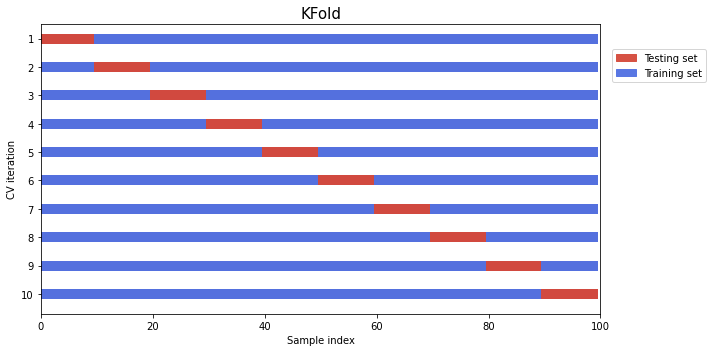

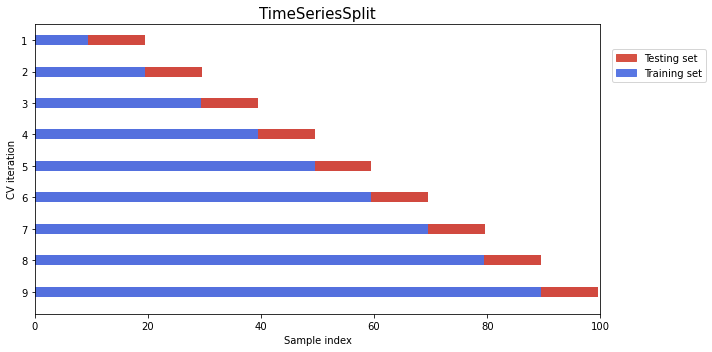

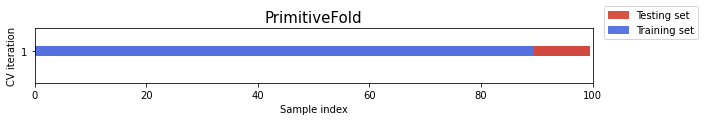

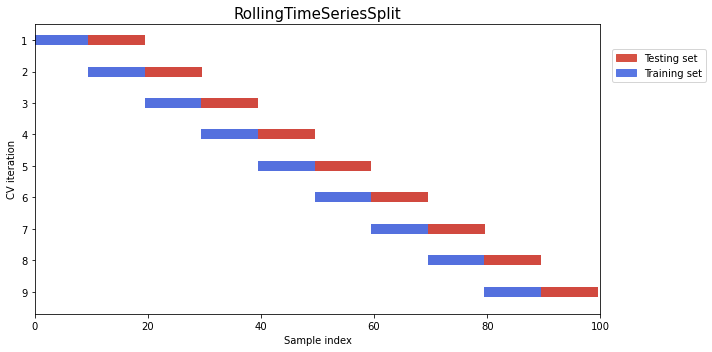

In [63]:
for name, kfold in kfolds.items():
    fig, ax = plt.subplots(figsize=(10, int(np.ceil(kfold.n_splits/2))))
    plotCvDiagram(kfold, ax)
    ax.legend([Patch(color=cmap_cv(0.9)), Patch(color=cmap_cv(.1))], ['Testing set', 'Training set'], loc=(1.02, .8))
    plt.tight_layout()
    #fig.subplots_adjust(right=.7)

In [22]:
def harmonicMean(array, axis=None):
    return len(array)/np.reciprocal(array).sum() if axis==None else array.shape[axis]/np.reciprocal(array).sum(axis=axis)
def weightedArithmeticMean(array, weights='optimal', variances=None, axis=None):
    if weights=='optimal': weights = np.reciprocal(variances)
    return (array*weights).sum(axis=axis)/weights.sum(axis=axis)

In [23]:
def bestParamsForTimeSeriesObtainedByVariousApproaches(gridWithMetricsMSE_AndRMSE):
    grid = gridWithMetricsMSE_AndRMSE
    cvResults = grid.cv_results_
    matrix_cvResultsOfMetrics= {}
    bestParams_variousApproaches = {}
    for nameMetric in ['MSE','RMSE']:
        matrix_cvResultsOfMetrics[nameMetric] = np.array([cvResults[k] for k in grid.cv_results_.keys() if fnmatch(k,f'split*_test_{nameMetric}')])
        scorePerSplits=np.mean(matrix_cvResultsOfMetrics[nameMetric], axis=0)
        argsortedScore = np.argsort(scorePerSplits)[::-1]
        bestParams=grid.cv_results_['params'][argsortedScore[0]]
        bestParams_variousApproaches[f'mean({nameMetric})']=bestParams
    for nameMetric in ['MSE','RMSE']:
        matrix_cvResultsOfMetrics[nameMetric] = np.array([cvResults[k] for k in grid.cv_results_.keys() if fnmatch(k,f'split*_test_{nameMetric}')])
        scorePerSplits=harmonicMean(matrix_cvResultsOfMetrics[nameMetric], axis=0)
        argsortedScore = np.argsort(scorePerSplits)[::-1]
        bestParams=grid.cv_results_['params'][argsortedScore[0]]
        bestParams_variousApproaches[f'harmonic_mean({nameMetric})']=bestParams
    scorePerSplits=weightedArithmeticMean(matrix_cvResultsOfMetrics['RMSE'], variances=matrix_cvResultsOfMetrics['MSE'], axis=0)
    argsortedScore = np.argsort(scorePerSplits)[::-1]
    bestParams=grid.cv_results_['params'][argsortedScore[0]]
    bestParams_variousApproaches['weighted_mean']=bestParams
    return bestParams_variousApproaches

In [24]:
def toCompareBestHiperparamsWithSetOfHiperparams(bestParamsForMethod, cv_name):
    for k, v in bestParamsForMethod.items():
        print(k)
        print(v)

In [27]:
%%time
param_grid_ElasticNet = {'polynomialfeatures__degree': [1, 2],
                                'elasticnet__alpha': np.linspace(0, 0.0625, 17),
                                'elasticnet__l1_ratio':np.linspace(0,0.250,17)
                        }
grids_ElasticNet[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), ElasticNet(alpha=1, tol=0.1)),
                    param_grid=param_grid_ElasticNet,
                    cv=kfold,
                    refit=False,
                    scoring=scoring)
grids_ElasticNet[cv_name].fit(X_train, y_train)

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480.27603153144514, tolerance: 250.8803002643385
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression esti

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461.22018390377434, tolerance: 250.8803002643385
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.3664766092258, tolerance: 253.57440110542248
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472.20566340545577, tolerance: 261.06394188209066
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461.22018390377434, tolerance: 250.8803002643385
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.3664766092258, tolerance: 253.57440110542248
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472.20566340545577, tolerance: 261.06394188209066
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461.22018390377434, tolerance: 250.8803002643385
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.3664766092258, tolerance: 253.57440110542248
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472.20566340545577, tolerance: 261.06394188209066
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461.22018390377434, tolerance: 250.8803002643385
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479.02772174706445, tolerance: 262.93479441483123
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 465.5510515516353, tolerance: 253.57440110542248
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480.1942420810718, tolerance: 264.5187608009373
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479.02772174706445, tolerance: 262.93479441483123
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 465.5510515516353, tolerance: 253.57440110542248
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480.1942420810718, tolerance: 264.5187608009373
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479.02772174706445, tolerance: 262.93479441483123
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 465.5510515516353, tolerance: 253.57440110542248
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480.1942420810718, tolerance: 264.5187608009373
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479.02772174706445, tolerance: 262.93479441483123
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 465.5510515516353, tolerance: 253.57440110542248
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480.1942420810718, tolerance: 264.5187608009373
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479.02772174706445, tolerance: 262.93479441483123
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 465.5510515516353, tolerance: 253.57440110542248
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461.22018390377434, tolerance: 250.8803002643385
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484.2057915181943, tolerance: 253.57440110542248
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 492.6812195899302, tolerance: 261.06394188209066
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 481.0702071273891, tolerance: 268.91134538602665
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinat

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 465.27197626182266, tolerance: 256.98852575865504
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 468.9862898386477, tolerance: 258.69163917802297
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 467.263029313246, tolerance: 262.93479441483123
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinat

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 470.78794237557645, tolerance: 264.5187608009373
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 487.45530074317384, tolerance: 250.8803002643385
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.4053675029843, tolerance: 244.04373456723616
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinat

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 499.93423614471897, tolerance: 261.06394188209066
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 488.7476882644525, tolerance: 268.91134538602665
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 494.5688426407056, tolerance: 255.7956738811318
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinat

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 478.1215566352034, tolerance: 258.69163917802297
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 476.36840601109884, tolerance: 262.93479441483123
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 478.773759515173, tolerance: 253.57440110542248
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinat

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 494.05930091407737, tolerance: 250.8803002643385
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 488.5126693130852, tolerance: 244.04373456723616
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 491.91021351188954, tolerance: 256.98852575865504
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordina

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480.12102589323257, tolerance: 250.8803002643385
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 476.6192769324416, tolerance: 244.04373456723616
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479.86987184414556, tolerance: 256.98852575865504
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordina

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484.971732824114, tolerance: 268.91134538602665
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 489.74713081914103, tolerance: 255.7956738811318
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 485.6687297575234, tolerance: 264.5187608009373
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 502.1080378018856, tolerance: 253.57440110542248
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511.31074078262634, tolerance: 261.06394188209066
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 500.70932443485214, tolerance: 268.91134538602665
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordin

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 486.9897680545098, tolerance: 256.98852575865504
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 491.51381854081035, tolerance: 258.69163917802297
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 489.80350366538556, tolerance: 262.93479441483123
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordin

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 492.9515975109015, tolerance: 264.5187608009373
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 504.49960866257425, tolerance: 250.8803002643385
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 498.2055061832888, tolerance: 244.04373456723616
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 491.85832826514684, tolerance: 250.8803002643385
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 487.7389657085711, tolerance: 244.04373456723616
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 491.922867439327, tolerance: 256.98852575865504
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate

CPU times: user 16min 44s, sys: 1min 3s, total: 17min 47s
Wall time: 2min 13s


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('elasticnet',
                                        ElasticNet(alpha=1, tol=0.1))]),
             param_grid={'elasticnet__alpha': array([0.        , 0.00390625, 0.0078125 , 0.01171875, 0.015625  ,
       0.01953125, 0.0234375 , 0.02734375, 0.03125   , 0.03515625,
       0.0390625 , 0.04296875, 0.046875  , 0.05078125, 0.0546875 ,
       0.05859375, 0.0625    ]),
                         'elasticnet__l1_ratio': array([0.      , 0.015625, 0.03125 , 0.046875, 0.0625  , 0.078125,
       0.09375 , 0.109375, 0.125   , 0.140625, 0.15625 , 0.171875,
       0.1875  , 0.203125, 0.21875 , 0.234375, 0.25    ]),
                         'polynomialfeatures__degree': [1, 2]},
             re

In [28]:
bestParamsForMethod = bestParamsForTimeSeriesObtainedByVariousApproaches(grids_ElasticNet[cv_name])
toCompareBestHiperparamsWithSetOfHiperparams(bestParamsForMethod, cv_name)
grids_ElasticNet[cv_name].param_grid

mean(MSE)
{'elasticnet__alpha': 0.0078125, 'elasticnet__l1_ratio': 0.015625, 'polynomialfeatures__degree': 1}
mean(RMSE)
{'elasticnet__alpha': 0.0078125, 'elasticnet__l1_ratio': 0.015625, 'polynomialfeatures__degree': 1}
harmonic_mean(MSE)
{'elasticnet__alpha': 0.00390625, 'elasticnet__l1_ratio': 0.171875, 'polynomialfeatures__degree': 1}
harmonic_mean(RMSE)
{'elasticnet__alpha': 0.00390625, 'elasticnet__l1_ratio': 0.125, 'polynomialfeatures__degree': 1}
weighted_mean
{'elasticnet__alpha': 0.00390625, 'elasticnet__l1_ratio': 0.21875, 'polynomialfeatures__degree': 1}


{'polynomialfeatures__degree': [1, 2],
 'elasticnet__alpha': array([0.        , 0.00390625, 0.0078125 , 0.01171875, 0.015625  ,
        0.01953125, 0.0234375 , 0.02734375, 0.03125   , 0.03515625,
        0.0390625 , 0.04296875, 0.046875  , 0.05078125, 0.0546875 ,
        0.05859375, 0.0625    ]),
 'elasticnet__l1_ratio': array([0.      , 0.015625, 0.03125 , 0.046875, 0.0625  , 0.078125,
        0.09375 , 0.109375, 0.125   , 0.140625, 0.15625 , 0.171875,
        0.1875  , 0.203125, 0.21875 , 0.234375, 0.25    ])}

In [29]:
%%time
param_grid_Lasso={'polynomialfeatures__degree': [1, 2],
            'lasso__alpha': np.linspace(0, 0.03, 51)
           }
grids_Lasso[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), Lasso(alpha=1, tol=0.1)),
                    param_grid=param_grid_Lasso,
                    cv=kfold,
                    refit=False,
                    scoring=scoring)
grids_Lasso[cv_name].fit(X_train, y_train)

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480.27603153144514, tolerance: 250.8803002643385
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression esti

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461.22018390377434, tolerance: 250.8803002643385
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

CPU times: user 1min 13s, sys: 5.15 s, total: 1min 18s
Wall time: 9.86 s


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('lasso', Lasso(alpha=1, tol=0.1))]),
             param_grid={'lasso__alpha': array([0.    , 0.0006, 0.0012, 0.0018, 0.0024, 0.003 , 0.0036, 0.0042,
       0.0048, 0.0054, 0.006 , 0.0066, 0.0072, 0.0078, 0.0084, 0.009 ,
       0.0....0108, 0.0114, 0.012 , 0.0126, 0.0132, 0.0138,
       0.0144, 0.015 , 0.0156, 0.0162, 0.0168, 0.0174, 0.018 , 0.0186,
       0.0192, 0.0198, 0.0204, 0.021 , 0.0216, 0.0222, 0.0228, 0.0234,
       0.024 , 0.0246, 0.0252, 0.0258, 0.0264, 0.027 , 0.0276, 0.0282,
       0.0288, 0.0294, 0.03  ]),
                         'polynomialfeatures__degree': [1, 2]},
             refit=False,
             scoring={'MSE': 'neg_mean_squared_error',
                 

In [30]:
bestParamsForMethod = bestParamsForTimeSeriesObtainedByVariousApproaches(grids_Lasso[cv_name])
toCompareBestHiperparamsWithSetOfHiperparams(bestParamsForMethod, cv_name)
grids_Lasso[cv_name].param_grid

mean(MSE)
{'lasso__alpha': 0.0012, 'polynomialfeatures__degree': 1}
mean(RMSE)
{'lasso__alpha': 0.0012, 'polynomialfeatures__degree': 1}
harmonic_mean(MSE)
{'lasso__alpha': 0.0012, 'polynomialfeatures__degree': 1}
harmonic_mean(RMSE)
{'lasso__alpha': 0.0012, 'polynomialfeatures__degree': 1}
weighted_mean
{'lasso__alpha': 0.0012, 'polynomialfeatures__degree': 1}


{'polynomialfeatures__degree': [1, 2],
 'lasso__alpha': array([0.    , 0.0006, 0.0012, 0.0018, 0.0024, 0.003 , 0.0036, 0.0042,
        0.0048, 0.0054, 0.006 , 0.0066, 0.0072, 0.0078, 0.0084, 0.009 ,
        0.0096, 0.0102, 0.0108, 0.0114, 0.012 , 0.0126, 0.0132, 0.0138,
        0.0144, 0.015 , 0.0156, 0.0162, 0.0168, 0.0174, 0.018 , 0.0186,
        0.0192, 0.0198, 0.0204, 0.021 , 0.0216, 0.0222, 0.0228, 0.0234,
        0.024 , 0.0246, 0.0252, 0.0258, 0.0264, 0.027 , 0.0276, 0.0282,
        0.0288, 0.0294, 0.03  ])}

In [31]:
%%time
param_grid_Ridge = {'polynomialfeatures__degree': [1, 2],
            'ridge__alpha':  np.linspace(5,25,41)
           }
grids_Ridge[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), Ridge(alpha=1, tol=0.1)),
                    param_grid=param_grid_Ridge,
                    cv=kfold,
                    refit=False,
                    scoring=scoring)
grids_Ridge[cv_name].fit(X_train, y_train)

CPU times: user 38.2 s, sys: 2.21 s, total: 40.4 s
Wall time: 5.07 s


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge(alpha=1, tol=0.1))]),
             param_grid={'polynomialfeatures__degree': [1, 2],
                         'ridge__alpha': array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ,
       10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5,
       16. , 16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. ,
       21.5, 22. , 22.5, 23. , 23.5, 24. , 24.5, 25. ])},
             refit=False,
             scoring={'MSE': 'neg_mean_squared_error',
                      'RMSE': 'neg_root_mean_squared_error'})

In [32]:
bestParamsForMethod = bestParamsForTimeSeriesObtainedByVariousApproaches(grids_Ridge[cv_name])
toCompareBestHiperparamsWithSetOfHiperparams(bestParamsForMethod, cv_name)
grids_Ridge[cv_name].param_grid

mean(MSE)
{'polynomialfeatures__degree': 1, 'ridge__alpha': 15.0}
mean(RMSE)
{'polynomialfeatures__degree': 1, 'ridge__alpha': 14.5}
harmonic_mean(MSE)
{'polynomialfeatures__degree': 1, 'ridge__alpha': 14.0}
harmonic_mean(RMSE)
{'polynomialfeatures__degree': 1, 'ridge__alpha': 14.5}
weighted_mean
{'polynomialfeatures__degree': 1, 'ridge__alpha': 13.5}


{'polynomialfeatures__degree': [1, 2],
 'ridge__alpha': array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ,
        10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5,
        16. , 16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. ,
        21.5, 22. , 22.5, 23. , 23.5, 24. , 24.5, 25. ])}

In [33]:
%%time
param_grid_LinearR = {'polynomialfeatures__degree': [1, 2]}
grids_LinearR[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression()),
                    param_grid=param_grid_LinearR,
                    cv=kfold,
                    refit=False,
                    scoring=scoring)
grids_LinearR[cv_name].fit(X_train, y_train)

CPU times: user 1.35 s, sys: 85 ms, total: 1.44 s
Wall time: 186 ms


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': [1, 2]}, refit=False,
             scoring={'MSE': 'neg_mean_squared_error',
                      'RMSE': 'neg_root_mean_squared_error'})

In [34]:
bestParamsForMethod = bestParamsForTimeSeriesObtainedByVariousApproaches(grids_LinearR[cv_name])
toCompareBestHiperparamsWithSetOfHiperparams(bestParamsForMethod, cv_name)
grids_LinearR[cv_name].param_grid

mean(MSE)
{'polynomialfeatures__degree': 1}
mean(RMSE)
{'polynomialfeatures__degree': 1}
harmonic_mean(MSE)
{'polynomialfeatures__degree': 1}
harmonic_mean(RMSE)
{'polynomialfeatures__degree': 1}
weighted_mean
{'polynomialfeatures__degree': 1}


{'polynomialfeatures__degree': [1, 2]}

In [36]:
%%time
param_grid_SVR = {"svr__C": np.linspace(100, 220, 31), 
                                "svr__gamma":np.linspace(0.00017, 0.00045, 29)}
grids_SVR[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), SVR(kernel='rbf', gamma=0.1)),
                    param_grid=param_grid_SVR,
                    cv=kfold,
                    refit=False,
                    scoring=scoring
                     )
grids_SVR[cv_name].fit(X_train, y_train)

CPU times: user 1h 9min 50s, sys: 206 ms, total: 1h 9min 50s
Wall time: 1h 9min 54s


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR(gamma=0.1))]),
             param_grid={'svr__C': array([100., 104., 108., 112., 116., 120., 124., 128., 132., 136., 140.,
       144., 148., 152., 156., 160., 164., 168., 172., 176., 180., 184.,
       188., 192., 196., 200., 204., 208., 212., 216., 220.]),
                         'svr__gamma': array([0.00017, 0.00018, 0.00019, 0.0002 , 0.00021, 0.00022, 0.00023,
       0.00024, 0.00025, 0.00026, 0.00027, 0.00028, 0.00029, 0.0003 ,
       0.00031, 0.00032, 0.00033, 0.00034, 0.00035, 0.00036, 0.00037,
       0.00038, 0.00039, 0.0004 , 0.00041, 0.00042, 0.00043, 0.00044,
       0.00045])},
             refit=False,
             scoring={'MSE': 'neg_mean_squared_error',
                      'RMSE': 'neg_root_mean_squared_error'})

In [37]:
bestParamsForMethod = bestParamsForTimeSeriesObtainedByVariousApproaches(grids_SVR[cv_name])
toCompareBestHiperparamsWithSetOfHiperparams(bestParamsForMethod, cv_name)
grids_SVR[cv_name].param_grid

mean(MSE)
{'svr__C': 100.0, 'svr__gamma': 0.00045}
mean(RMSE)
{'svr__C': 100.0, 'svr__gamma': 0.00045}
harmonic_mean(MSE)
{'svr__C': 100.0, 'svr__gamma': 0.00045}
harmonic_mean(RMSE)
{'svr__C': 100.0, 'svr__gamma': 0.00045}
weighted_mean
{'svr__C': 100.0, 'svr__gamma': 0.00045}


{'svr__C': array([100., 104., 108., 112., 116., 120., 124., 128., 132., 136., 140.,
        144., 148., 152., 156., 160., 164., 168., 172., 176., 180., 184.,
        188., 192., 196., 200., 204., 208., 212., 216., 220.]),
 'svr__gamma': array([0.00017, 0.00018, 0.00019, 0.0002 , 0.00021, 0.00022, 0.00023,
        0.00024, 0.00025, 0.00026, 0.00027, 0.00028, 0.00029, 0.0003 ,
        0.00031, 0.00032, 0.00033, 0.00034, 0.00035, 0.00036, 0.00037,
        0.00038, 0.00039, 0.0004 , 0.00041, 0.00042, 0.00043, 0.00044,
        0.00045])}

In [38]:
def unhiperparameterizedNestedCopyOfEstimator(estimator):
    try:
        return estimator.__class__()
    except TypeError:
        steps = [(name, unhiperparameterizedNestedCopyOfEstimator(estimator))  for name, estimator in estimator.steps]
        return estimator.__class__(steps)

In [39]:
def refitModelsOfPointingCvTypeUsingListOfCalculatedGrids_method(models, cv_name, listOfGrids_method, X, y):
    models[cv_name] = []
    for grids_ in listOfGrids_method:
        grid_ = grids_[cv_name]
        for approach, params in bestParamsForTimeSeriesObtainedByVariousApproaches(grid_).items():
            #create a new estimator for the approach
            estimator = unhiperparameterizedNestedCopyOfEstimator(grid_.estimator).set_params(**params)
            try: name_estimator =  estimator.steps[-1][-1].__str__()
            except AttributeError: name_estimator =  estimator.__str__()
            name_estimator = name_estimator[:name_estimator.find('(')]
            models[cv_name].append((f'{approach}_{name_estimator}', estimator.fit(X, y)))

In [40]:
from sklearn import  metrics
def outcomeOfModelsPredictionForVariousApproaches(models, cv_name, X, y):
    r2 = []
    explained_variance_score = []
    median_absolute_error = []
    mean_squared_error = []
    mean_absolute_error = []
    for name, model in models[cv_name]:
        r2.append(metrics.r2_score(y, model.predict(X)))
        explained_variance_score.append(metrics.explained_variance_score(y, model.predict(X)))
        mean_squared_error.append(metrics.mean_squared_error(y, model.predict(X)))
        mean_absolute_error.append(metrics.mean_absolute_error(y, model.predict(X)))

    d = {'r2': r2, 
         'explained_variance_score': explained_variance_score, 
         'mean_squared_error' : mean_squared_error,
         'mean_absolute_error' : mean_absolute_error,
        }
    df = pd.DataFrame(data=d)
    df.insert(loc=0, column='Method', value=[name for name, _ in models[cv_name]])
    print(cv_name)
    return df

In [41]:
# using calculated grids for a given cross-validation type and training data I creat best models
# from best hiperparams and refit it using training data.  
listOfGrids_method = grids_ElasticNet, grids_Lasso, grids_Ridge, grids_LinearR, grids_SVR
refitModelsOfPointingCvTypeUsingListOfCalculatedGrids_method(models, cv_name, listOfGrids_method, X_train, y_train)

In [42]:
outcomeOfModelsPredictionForVariousApproaches(models, cv_name, X_test, y_test)

KFold_10


Method        r2  explained_variance_score  \
0                   mean(MSE)_ElasticNet  0.707929                  0.707976   
1                  mean(RMSE)_ElasticNet  0.707929                  0.707976   
2          harmonic_mean(MSE)_ElasticNet  0.708107                  0.708153   
3         harmonic_mean(RMSE)_ElasticNet  0.708112                  0.708158   
4               weighted_mean_ElasticNet  0.708101                  0.708147   
5                        mean(MSE)_Lasso  0.708218                  0.708264   
6                       mean(RMSE)_Lasso  0.708218                  0.708264   
7               harmonic_mean(MSE)_Lasso  0.708218                  0.708264   
8              harmonic_mean(RMSE)_Lasso  0.708218                  0.708264   
9                    weighted_mean_Lasso  0.708218                  0.708264   
10                       mean(MSE)_Ridge  0.708065                  0.708111   
11                      mean(RMSE)_Ridge  0.708074                  0.708119   
12              harmonic_mean(MSE)_Ridge  0.708082                  0.708127   
13             harmonic_mean(RMSE)_Ridge  0.708074                  0.708119   
14                   weighted_mean_Ridge  0.708090                  0.708136   
15            mean(MSE)_LinearRegression  0.708295                  0.708340   
16           mean(RMSE)_LinearRegression  0.708295                  0.708340   
17   harmonic_mean(MSE)_LinearRegression  0.708295                  0.708340   
18  harmonic_mean(RMSE)_LinearRegression  0.708295                  0.708340   
19        weighted_mean_LinearRegression  0.708295                  0.708340   
20                         mean(MSE)_SVR  0.705970                  0.706004   
21                        mean(RMSE)_SVR  0.705970                  0.706004   
22                harmonic_mean(MSE)_SVR  0.705970                  0.706004   
23               harmonic_mean(RMSE)_SVR  0.705970                  0.706004   
24                     weighted_mean_SVR  0.705970                  0.706004   

    mean_squared_error  mean_absolute_error  
0             0.298791             0.431241  
1             0.298791             0.431241  
2             0.298610             0.431148  
3             0.298605             0.431155  
4             0.298616             0.431142  
5             0.298496             0.431094  
6             0.298496             0.431094  
7             0.298496             0.431094  
8             0.298496             0.431094  
9             0.298496             0.431094  
10            0.298652             0.431193  
11            0.298644             0.431191  
12            0.298635             0.431188  
13            0.298644             0.431191  
14            0.298627             0.431185  
15            0.298417             0.431119  
16            0.298417             0.431119  
17            0.298417             0.431119  
18            0.298417             0.431119  
19            0.298417             0.431119  
20            0.300796             0.432133  
21            0.300796             0.432133  
22            0.300796             0.432133  
23            0.300796             0.432133  
24            0.300796             0.432133

In [43]:
%%time
for cv_name, kfold in list(kfolds.items())[1:]:
    grids_ElasticNet[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2),
                                                           ElasticNet(alpha=1, tol=0.1)),
                                             param_grid=param_grid_ElasticNet,
                                             cv=kfold,
                                             refit=False,
                                             scoring=scoring)
    grids_ElasticNet[cv_name].fit(X_train, y_train)
    
    grids_Lasso[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2),
                                                      Lasso(alpha=1, tol=0.1)),
                                        param_grid=param_grid_Lasso,
                                        cv=kfold,
                                        refit=False,
                                        scoring=scoring)
    grids_Lasso[cv_name].fit(X_train, y_train)
    
    grids_Ridge[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2),
                                                      Ridge(alpha=1, tol=0.1)),
                                        param_grid=param_grid_Ridge,
                                        cv=kfold,
                                        refit=False,
                                        scoring=scoring)
    grids_Ridge[cv_name].fit(X_train, y_train)
    
    grids_LinearR[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2),
                                                        LinearRegression()),
                                          param_grid=param_grid_LinearR,
                                          cv=kfold,
                                          refit=False,
                                          scoring=scoring)
    grids_LinearR[cv_name].fit(X_train, y_train)
    
    grids_SVR[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), SVR(kernel='rbf', gamma=0.1)),
                                      param_grid=param_grid_SVR,
                                      cv=kfold,
                                      refit=False,
                                      scoring=scoring)
    grids_SVR[cv_name].fit(X_train, y_train)

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53.9594828762043, tolerance: 35.62387885007262
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estima

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92.49550542797758, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92.49550542797758, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92.49550542797758, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92.49550542797758, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92.49550542797758, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92.49550542797758, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92.49550542797758, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92.49550542797758, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92.49550542797758, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92.49550542797758, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92.49550542797758, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92.49550542797758, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92.49550542797758, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92.49550542797758, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92.49550542797758, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92.49550542797758, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92.49550542797758, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95.33441241743742, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152.25191850815978, tolerance: 106.82361726813511
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207.01988547800718, tolerance: 134.87893556884535
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordina

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99.24521251667566, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156.11721419675234, tolerance: 106.82361726813511
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210.72632733667973, tolerance: 134.87893556884535
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordina

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102.12359354703155, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159.18300602690098, tolerance: 106.82361726813511
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213.83136960677203, tolerance: 134.87893556884535
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordin

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104.47824401511208, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161.8147938112263, tolerance: 106.82361726813511
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216.5807045307853, tolerance: 134.87893556884535
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinat

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106.50760480222203, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164.15882079020813, tolerance: 106.82361726813511
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219.0823615115393, tolerance: 134.87893556884535
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordina

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108.31135806987027, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166.29172684360597, tolerance: 106.82361726813511
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221.39568734244503, tolerance: 134.87893556884535
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordin

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.20458556078593, tolerance: 35.62387885007262
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109.94724538988991, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168.2600265457612, tolerance: 106.82361726813511
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.35375062395519, tolerance: 35.62387885007262
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122.39241798569627, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.98797696576742, tolerance: 106.82361726813511
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinat

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.37817097094006, tolerance: 35.62387885007262
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112.16333246187862, tolerance: 78.11483600055827
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170.96901994790508, tolerance: 106.82361726813511
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinat

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480.1942420810718, tolerance: 264.5187608009373
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 462.90433043240193, tolerance: 264.48629158131746
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 462.90433043240193, tolerance: 264.48629158131746
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 462.90433043240193, tolerance: 264.48629158131746
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 470.76199464913765, tolerance: 264.48629158131746
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 487.97366994133023, tolerance: 264.48629158131746
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 473.11628304066426, tolerance: 264.48629158131746
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordi

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480.17878424445513, tolerance: 264.48629158131746
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.76395974844468, tolerance: 18.853958933275333
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.12468434399014, tolerance: 22.804113462597698
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.137920404599335, tolerance: 32.35665359401047
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.935923614447084, tolerance: 19.806420437423252
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression est

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.064653642378595, tolerance: 28.080908807545597
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.794165461560056, tolerance: 35.55902028769375
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression esti

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.59070319333055, tolerance: 22.804113462597698
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression esti

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.650103041463275, tolerance: 31.25125872346497
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.76395974844468, tolerance: 18.853958933275333
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.12468434399014, tolerance: 22.804113462597698
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.137920404599335, tolerance: 32.35665359401047
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.935923614447084, tolerance: 19.806420437423252
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.66197139176819, tolerance: 27.798931301107633
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.064653642378595, tolerance: 28.080908807545597
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.794165461560056, tolerance: 35.55902028769375
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression esti

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.76395974844468, tolerance: 18.853958933275333
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression esti

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.137920404599335, tolerance: 32.35665359401047
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.935923614447084, tolerance: 19.806420437423252
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54.07662005184, tolerance: 35.55902028769375
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56.44938179638965, tolerance: 41.84877306543495
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53.98767656650944, tolerance: 28.080908807545597
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_des

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.11675859489886, tolerance: 18.853958933275333
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.36594694420063, tolerance: 31.25125872346497
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54.57361281260861, tolerance: 35.55902028769375
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.82389050097961, tolerance: 19.806420437423252
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.929733751655235, tolerance: 32.35665359401047
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.83283780460648, tolerance: 22.804113462597698
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinat

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.66510970857216, tolerance: 19.806420437423252
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.35820395125709, tolerance: 32.35665359401047
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.771399323980475, tolerance: 22.804113462597698
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinat

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.412346732069295, tolerance: 19.806420437423252
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.5744854917978, tolerance: 32.35665359401047
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.56990299105118, tolerance: 22.804113462597698
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.08840726075283, tolerance: 19.806420437423252
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.640903073208015, tolerance: 32.35665359401047
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.26859237502986, tolerance: 22.804113462597698
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinat

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.708043234274896, tolerance: 19.806420437423252
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.594765368775235, tolerance: 32.35665359401047
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.89213440579914, tolerance: 22.804113462597698
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordina

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.281474760432864, tolerance: 19.806420437423252
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.46039921404341, tolerance: 32.35665359401047
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.4568276339412, tolerance: 22.804113462597698
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.935923614447084, tolerance: 19.806420437423252
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

CPU times: user 51min 19s, sys: 56.2 s, total: 52min 15s
Wall time: 38min 10s


In [647]:
listOfGrids_method = grids_ElasticNet, grids_Lasso, grids_Ridge, grids_LinearR, grids_SVR

outcomes = {}
for cv_name in kfolds:
    refitModelsOfPointingCvTypeUsingListOfCalculatedGrids_method(models, cv_name, listOfGrids_method, X_train, y_train)
    outcomes[cv_name] = outcomeOfModelsPredictionForVariousApproaches(models, cv_name, X_test, y_test)
    display(outcomes[cv_name])


KFold_10


Method        r2  explained_variance_score  \
0                   mean(MSE)_ElasticNet  0.707929                  0.707976   
1                  mean(RMSE)_ElasticNet  0.707929                  0.707976   
2          harmonic_mean(MSE)_ElasticNet  0.708107                  0.708153   
3         harmonic_mean(RMSE)_ElasticNet  0.708112                  0.708158   
4               weighted_mean_ElasticNet  0.708101                  0.708147   
5                        mean(MSE)_Lasso  0.708218                  0.708264   
6                       mean(RMSE)_Lasso  0.708218                  0.708264   
7               harmonic_mean(MSE)_Lasso  0.708218                  0.708264   
8              harmonic_mean(RMSE)_Lasso  0.708218                  0.708264   
9                    weighted_mean_Lasso  0.708218                  0.708264   
10                       mean(MSE)_Ridge  0.708065                  0.708111   
11                      mean(RMSE)_Ridge  0.708074                  0.708119   
12              harmonic_mean(MSE)_Ridge  0.708082                  0.708127   
13             harmonic_mean(RMSE)_Ridge  0.708074                  0.708119   
14                   weighted_mean_Ridge  0.708090                  0.708136   
15            mean(MSE)_LinearRegression  0.708295                  0.708340   
16           mean(RMSE)_LinearRegression  0.708295                  0.708340   
17   harmonic_mean(MSE)_LinearRegression  0.708295                  0.708340   
18  harmonic_mean(RMSE)_LinearRegression  0.708295                  0.708340   
19        weighted_mean_LinearRegression  0.708295                  0.708340   
20                         mean(MSE)_SVR  0.705970                  0.706004   
21                        mean(RMSE)_SVR  0.705970                  0.706004   
22                harmonic_mean(MSE)_SVR  0.705970                  0.706004   
23               harmonic_mean(RMSE)_SVR  0.705970                  0.706004   
24                     weighted_mean_SVR  0.705970                  0.706004   

    mean_squared_error  mean_absolute_error  
0             0.298791             0.431241  
1             0.298791             0.431241  
2             0.298610             0.431148  
3             0.298605             0.431155  
4             0.298616             0.431142  
5             0.298496             0.431094  
6             0.298496             0.431094  
7             0.298496             0.431094  
8             0.298496             0.431094  
9             0.298496             0.431094  
10            0.298652             0.431193  
11            0.298644             0.431191  
12            0.298635             0.431188  
13            0.298644             0.431191  
14            0.298627             0.431185  
15            0.298417             0.431119  
16            0.298417             0.431119  
17            0.298417             0.431119  
18            0.298417             0.431119  
19            0.298417             0.431119  
20            0.300796             0.432133  
21            0.300796             0.432133  
22            0.300796             0.432133  
23            0.300796             0.432133  
24            0.300796             0.432133

TimeSeriesSplit_9


Method        r2  explained_variance_score  \
0                   mean(MSE)_ElasticNet  0.707125                  0.707177   
1                  mean(RMSE)_ElasticNet  0.707125                  0.707177   
2          harmonic_mean(MSE)_ElasticNet  0.707669                  0.707718   
3         harmonic_mean(RMSE)_ElasticNet  0.707125                  0.707177   
4               weighted_mean_ElasticNet  0.707669                  0.707718   
5                        mean(MSE)_Lasso  0.708167                  0.708214   
6                       mean(RMSE)_Lasso  0.708167                  0.708214   
7               harmonic_mean(MSE)_Lasso  0.708167                  0.708214   
8              harmonic_mean(RMSE)_Lasso  0.708167                  0.708214   
9                    weighted_mean_Lasso  0.708167                  0.708214   
10                       mean(MSE)_Ridge  0.708223                  0.708268   
11                      mean(RMSE)_Ridge  0.708223                  0.708268   
12              harmonic_mean(MSE)_Ridge  0.708223                  0.708268   
13             harmonic_mean(RMSE)_Ridge  0.708223                  0.708268   
14                   weighted_mean_Ridge  0.708223                  0.708268   
15            mean(MSE)_LinearRegression  0.708295                  0.708340   
16           mean(RMSE)_LinearRegression  0.708295                  0.708340   
17   harmonic_mean(MSE)_LinearRegression  0.708295                  0.708340   
18  harmonic_mean(RMSE)_LinearRegression  0.708295                  0.708340   
19        weighted_mean_LinearRegression  0.708295                  0.708340   
20                         mean(MSE)_SVR  0.706666                  0.706684   
21                        mean(RMSE)_SVR  0.706666                  0.706684   
22                harmonic_mean(MSE)_SVR  0.706666                  0.706684   
23               harmonic_mean(RMSE)_SVR  0.706666                  0.706684   
24                     weighted_mean_SVR  0.705970                  0.706004   

    mean_squared_error  mean_absolute_error  
0             0.299614             0.431685  
1             0.299614             0.431685  
2             0.299057             0.431345  
3             0.299614             0.431685  
4             0.299057             0.431345  
5             0.298548             0.431091  
6             0.298548             0.431091  
7             0.298548             0.431091  
8             0.298548             0.431091  
9             0.298548             0.431091  
10            0.298491             0.431142  
11            0.298491             0.431142  
12            0.298491             0.431142  
13            0.298491             0.431142  
14            0.298491             0.431142  
15            0.298417             0.431119  
16            0.298417             0.431119  
17            0.298417             0.431119  
18            0.298417             0.431119  
19            0.298417             0.431119  
20            0.300084             0.431937  
21            0.300084             0.431937  
22            0.300084             0.431937  
23            0.300084             0.431937  
24            0.300796             0.432133

PrimitiveFold_9


Method        r2  explained_variance_score  \
0                   mean(MSE)_ElasticNet  0.705521                  0.705521   
1                  mean(RMSE)_ElasticNet  0.705521                  0.705521   
2          harmonic_mean(MSE)_ElasticNet  0.705521                  0.705521   
3         harmonic_mean(RMSE)_ElasticNet  0.705521                  0.705521   
4               weighted_mean_ElasticNet  0.705521                  0.705521   
5                        mean(MSE)_Lasso  0.709400                  0.709402   
6                       mean(RMSE)_Lasso  0.709400                  0.709402   
7               harmonic_mean(MSE)_Lasso  0.709400                  0.709402   
8              harmonic_mean(RMSE)_Lasso  0.709400                  0.709402   
9                    weighted_mean_Lasso  0.709400                  0.709402   
10                       mean(MSE)_Ridge  0.707892                  0.707938   
11                      mean(RMSE)_Ridge  0.707892                  0.707938   
12              harmonic_mean(MSE)_Ridge  0.707892                  0.707938   
13             harmonic_mean(RMSE)_Ridge  0.707892                  0.707938   
14                   weighted_mean_Ridge  0.707892                  0.707938   
15            mean(MSE)_LinearRegression  0.708295                  0.708340   
16           mean(RMSE)_LinearRegression  0.708295                  0.708340   
17   harmonic_mean(MSE)_LinearRegression  0.708295                  0.708340   
18  harmonic_mean(RMSE)_LinearRegression  0.708295                  0.708340   
19        weighted_mean_LinearRegression  0.708295                  0.708340   
20                         mean(MSE)_SVR  0.705955                  0.705992   
21                        mean(RMSE)_SVR  0.705955                  0.705992   
22                harmonic_mean(MSE)_SVR  0.705955                  0.705992   
23               harmonic_mean(RMSE)_SVR  0.705955                  0.705992   
24                     weighted_mean_SVR  0.705955                  0.705992   

    mean_squared_error  mean_absolute_error  
0             0.301255             0.431482  
1             0.301255             0.431482  
2             0.301255             0.431482  
3             0.301255             0.431482  
4             0.301255             0.431482  
5             0.297287             0.429880  
6             0.297287             0.429880  
7             0.297287             0.429880  
8             0.297287             0.429880  
9             0.297287             0.429880  
10            0.298830             0.431268  
11            0.298830             0.431268  
12            0.298830             0.431268  
13            0.298830             0.431268  
14            0.298830             0.431268  
15            0.298417             0.431119  
16            0.298417             0.431119  
17            0.298417             0.431119  
18            0.298417             0.431119  
19            0.298417             0.431119  
20            0.300811             0.432162  
21            0.300811             0.432162  
22            0.300811             0.432162  
23            0.300811             0.432162  
24            0.300811             0.432162

RollingTSS_9


Method        r2  explained_variance_score  \
0                   mean(MSE)_ElasticNet  0.705526                  0.705583   
1                  mean(RMSE)_ElasticNet  0.705526                  0.705583   
2          harmonic_mean(MSE)_ElasticNet  0.705526                  0.705583   
3         harmonic_mean(RMSE)_ElasticNet  0.705526                  0.705583   
4               weighted_mean_ElasticNet  0.705526                  0.705583   
5                        mean(MSE)_Lasso  0.708039                  0.708088   
6                       mean(RMSE)_Lasso  0.708039                  0.708088   
7               harmonic_mean(MSE)_Lasso  0.708039                  0.708088   
8              harmonic_mean(RMSE)_Lasso  0.708039                  0.708088   
9                    weighted_mean_Lasso  0.708039                  0.708088   
10                       mean(MSE)_Ridge  0.708090                  0.708136   
11                      mean(RMSE)_Ridge  0.708090                  0.708136   
12              harmonic_mean(MSE)_Ridge  0.708090                  0.708136   
13             harmonic_mean(RMSE)_Ridge  0.708090                  0.708136   
14                   weighted_mean_Ridge  0.708090                  0.708136   
15            mean(MSE)_LinearRegression  0.708295                  0.708340   
16           mean(RMSE)_LinearRegression  0.708295                  0.708340   
17   harmonic_mean(MSE)_LinearRegression  0.708295                  0.708340   
18  harmonic_mean(RMSE)_LinearRegression  0.708295                  0.708340   
19        weighted_mean_LinearRegression  0.708295                  0.708340   
20                         mean(MSE)_SVR  0.706226                  0.706242   
21                        mean(RMSE)_SVR  0.706226                  0.706242   
22                harmonic_mean(MSE)_SVR  0.706226                  0.706242   
23               harmonic_mean(RMSE)_SVR  0.706226                  0.706242   
24                     weighted_mean_SVR  0.706226                  0.706242   

    mean_squared_error  mean_absolute_error  
0             0.301250             0.432733  
1             0.301250             0.432733  
2             0.301250             0.432733  
3             0.301250             0.432733  
4             0.301250             0.432733  
5             0.298679             0.431115  
6             0.298679             0.431115  
7             0.298679             0.431115  
8             0.298679             0.431115  
9             0.298679             0.431115  
10            0.298627             0.431185  
11            0.298627             0.431185  
12            0.298627             0.431185  
13            0.298627             0.431185  
14            0.298627             0.431185  
15            0.298417             0.431119  
16            0.298417             0.431119  
17            0.298417             0.431119  
18            0.298417             0.431119  
19            0.298417             0.431119  
20            0.300534             0.432118  
21            0.300534             0.432118  
22            0.300534             0.432118  
23            0.300534             0.432118  
24            0.300534             0.432118

In [ ]:
#standardMeans = ('mean(MSE)_', 'mean(RMSE)_')
#weightedMeans = ('harmonic_mean(MSE)', 'harmonic_mean(RMSE)', 'weighted_mean_') 

In [45]:
import pandas as pd
series_raw_2 = pd.read_csv('./sunspots.csv', index_col = 'YEAR', squeeze = True, parse_dates=['YEAR'])
series_raw_2.head()

YEAR
1700-01-01     5.0
1701-01-01    11.0
1702-01-01    16.0
1703-01-01    23.0
1704-01-01    36.0
Name: SUNACTIVITY, dtype: float64

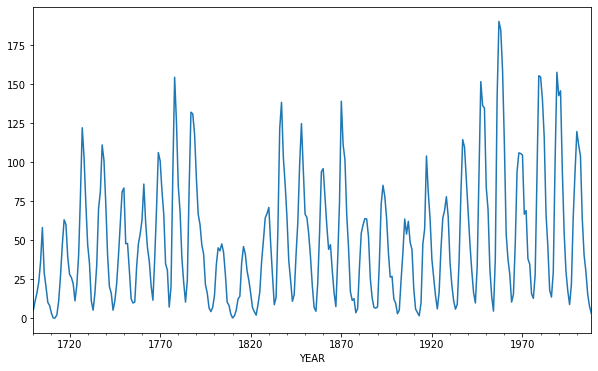

In [46]:
plt.figure(figsize=(10,6));
series_raw_2.plot()
plt.show()

In [47]:
series_2 = series_raw_2.values

In [48]:
resultsAR_2=[]
for order in range(1,16):
    model = sm.tsa.ARMA(series_2, (order,0))
    resultsAR_2.append(model.fit())

bic_criteria_2 = [result.bic for result in resultsAR_2]

/home/marsob/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.55212D+00    |proj g|=  3.10774D-04

At iterate    5    f=  4.55212D+00    |proj g|=  5.35128D-04

At iterate   10    f=  4.55205D+00    |proj g|=  3.37419D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     16      1     0     0   0.000D+00   4.552D+00
  F =   4.5520536447013376     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.22090D+00    |proj g|=  2.95595D-03

At iterate    5    f=  4.22087D+00    |proj g|=  1.65290D-04

At iterate   10    f=  4.22085D+00    |proj g|=  1.80762D-03

At iterate   15    f=  4.22084D+00    |proj g|=  2.57572D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     20      1     0     0   1.776D-07   4.221D+00
  F =   4.2208374094521597     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21     27      1     0     0   8.882D-08   4.207D+00
  F =   4.2066791264864563     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.18109D+00    |proj g|=  3.50262D-03

At iterate    5    f=  4.18096D+00    |proj g|=  6.65867D-04

At iterate   10    f=  4.18095D+00    |proj g|=  1.53726D-03


 This problem is unconstrained.



At iterate   15    f=  4.18079D+00    |proj g|=  3.00799D-03

At iterate   20    f=  4.18076D+00    |proj g|=  4.49418D-05

At iterate   25    f=  4.18076D+00    |proj g|=  7.99361D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     27     32      1     0     0   1.776D-07   4.181D+00
  F =   4.1807571908165677     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.15649D+00    |proj g|=  3.74740D-03

At iter

 This problem is unconstrained.



At iterate   10    f=  4.15628D+00    |proj g|=  5.78027D-04

At iterate   15    f=  4.15608D+00    |proj g|=  4.49489D-03

At iterate   20    f=  4.15599D+00    |proj g|=  7.78044D-05

At iterate   25    f=  4.15599D+00    |proj g|=  2.66454D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     27     32      1     0     0   8.882D-08   4.156D+00
  F =   4.1559937467638006     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  4.12449D+00    |proj g|=  2.57927D-04

At iterate   15    f=  4.12444D+00    |proj g|=  2.48175D-03

At iterate   20    f=  4.12399D+00    |proj g|=  5.10170D-04

At iterate   25    f=  4.12398D+00    |proj g|=  2.02505D-05

At iterate   30    f=  4.12398D+00    |proj g|=  1.15463D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     34     39      1     0     0   3.553D-07   4.124D+00
  F =   4.1239848088884496     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           12

 This problem is unconstrained.



At iterate    5    f=  4.12456D+00    |proj g|=  1.66365D-03

At iterate   10    f=  4.12451D+00    |proj g|=  2.62990D-04

At iterate   15    f=  4.12445D+00    |proj g|=  3.23519D-03

At iterate   20    f=  4.12399D+00    |proj g|=  1.47411D-03

At iterate   25    f=  4.12398D+00    |proj g|=  3.81917D-05

At iterate   30    f=  4.12398D+00    |proj g|=  2.66454D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     32     35      1     0     0   8.882D-08   4.124D+00
  F =   4.1239826662023242     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.12501D+00    |proj g|=  4.76064D-03

At iterate    5    f=  4.12460D+00    |proj g|=  3.73213D-03

At iterate   10    f=  4.12454D+00    |proj g|=  1.30456D-03

At iterate   15    f=  4.12453D+00    |proj g|=  9.31699D-04

At iterate   20    f=  4.12411D+00    |proj g|=  4.71703D-03

At iterate   25    f=  4.12396D+00    |proj g|=  5.48894D-05

At iterate   30    f=  4.12396D+00    |proj g|=  6.21725D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  4.12464D+00    |proj g|=  2.57909D-03

At iterate   10    f=  4.12459D+00    |proj g|=  2.84128D-04

At iterate   15    f=  4.12457D+00    |proj g|=  4.44711D-03

At iterate   20    f=  4.12401D+00    |proj g|=  3.84484D-03

At iterate   25    f=  4.12396D+00    |proj g|=  8.29559D-05

At iterate   30    f=  4.12396D+00    |proj g|=  1.86517D-06

At iterate   35    f=  4.12396D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     38     43      1     0     0   1.776D-07   4.124D+00
  F =   4.1239638561153873     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  4.12471D+00    |proj g|=  4.32863D-03

At iterate   10    f=  4.12465D+00    |proj g|=  2.95230D-04

At iterate   15    f=  4.12460D+00    |proj g|=  3.89635D-03

At iterate   20    f=  4.12399D+00    |proj g|=  1.97184D-03

At iterate   25    f=  4.12396D+00    |proj g|=  2.42473D-05

At iterate   30    f=  4.12396D+00    |proj g|=  1.15463D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     34     44      1     0     0   1.688D-06   4.124D+00
  F =   4.1239633679208874     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.12412D+00    |proj g|=  1.20591D-02

At iterate    5    f=  4.12333D+00    |proj g|=  1.27875D-02

At iterate   10    f=  4.12313D+00    |proj g|=  4.56080D-04

At iterate   15    f=  4.12312D+00    |proj g|=  1.15747D-03

At iterate   20    f=  4.12277D+00    |proj g|=  1.40392D-02

At iterate   25    f=  4.12231D+00    |proj g|=  1.65645D-04

At iterate   30    f=  4.12231D+00    |proj g|=  4.44089D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  4.12084D+00    |proj g|=  9.19798D-03

At iterate   10    f=  4.12071D+00    |proj g|=  7.02283D-04

At iterate   15    f=  4.12070D+00    |proj g|=  1.20481D-03

At iterate   20    f=  4.12033D+00    |proj g|=  1.56565D-02

At iterate   25    f=  4.11991D+00    |proj g|=  3.01892D-04

At iterate   30    f=  4.11991D+00    |proj g|=  2.93099D-06

At iterate   35    f=  4.11991D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     38     42      1     0     0   1.776D-07   4.120D+00
  F =   4.1199082984529083     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

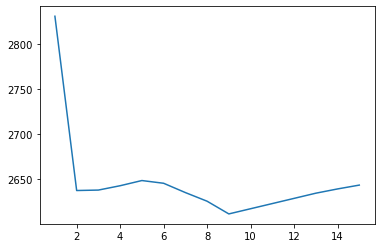

In [49]:
plt.plot(range(1,len(bic_criteria_2)+1),bic_criteria_2)

In [50]:
orderOfModel_2 = np.argmin(bic_criteria_2)+1
orderOfModel_2

9

In [51]:
# to compare the prediction results for different time series, the series is normalized 
series_2 -= series_2.mean()
series_2 /= np.std(series_2)

In [52]:
series_train_2, series_test_2 = train_test_split(series_2, test_size=0.20, random_state=42, shuffle=False)

In [53]:
df_train_2 = pd.DataFrame()
df_train_2['t'] = [x for x in series_train_2]
dataframe_train_2 = series_to_supervised(df_train_2, orderOfModel_2)
dataframe_train_2.head()

var1(t-9)  var1(t-8)  var1(t-7)  var1(t-6)  var1(t-5)  var1(t-4)  \
9   -1.108080  -0.959517  -0.835715  -0.662393  -0.340507   0.204221   
10  -0.959517  -0.835715  -0.662393  -0.340507   0.204221  -0.513830   
11  -0.835715  -0.662393  -0.340507   0.204221  -0.513830  -0.736674   
12  -0.662393  -0.340507   0.204221  -0.513830  -0.736674  -0.984278   
13  -0.340507   0.204221  -0.513830  -0.736674  -0.984278  -1.033798   

    var1(t-3)  var1(t-2)  var1(t-1)   var1(t)  
9   -0.513830  -0.736674  -0.984278 -1.033798  
10  -0.736674  -0.984278  -1.033798 -1.157600  
11  -0.984278  -1.033798  -1.157600 -1.231882  
12  -1.033798  -1.157600  -1.231882 -1.231882  
13  -1.157600  -1.231882  -1.231882 -1.182361

In [54]:
df_test_2 = pd.DataFrame()
df_test_2['t'] = [x for x in series_test_2]
dataframe_test_2 = series_to_supervised(df_test_2, orderOfModel_2)
dataframe_test_2.head()

var1(t-9)  var1(t-8)  var1(t-7)  var1(t-6)  var1(t-5)  var1(t-4)  \
9    2.521794   2.142960   2.103343   0.845515   0.486490  -0.451929   
10   2.142960   2.103343   0.845515   0.486490  -0.451929  -0.887712   
11   2.103343   0.845515   0.486490  -0.451929  -0.887712  -1.122936   
12   0.845515   0.486490  -0.451929  -0.887712  -1.122936  -0.290987   
13   0.486490  -0.451929  -0.887712  -1.122936  -0.290987   2.276666   

    var1(t-3)  var1(t-2)  var1(t-1)   var1(t)  
9   -0.887712  -1.122936  -0.290987  2.276666  
10  -1.122936  -0.290987   2.276666  3.477545  
11  -0.290987   2.276666   3.477545  3.343839  
12   2.276666   3.477545   3.343839  2.705021  
13   3.477545   3.343839   2.705021  1.548710

In [55]:
# split into input and output
X_train_2, y_train_2 = dataframe_train_2.values[:,:-1], dataframe_train_2.values[:,-1]
X_test_2, y_test_2 = dataframe_test_2.values[:,:-1], dataframe_test_2.values[:,-1]

In [56]:
X_train_2.shape, y_train_2.shape, X_test_2.shape, y_test_2.shape

((238, 9), (238,), (53, 9), (53,))

In [57]:
models_2={}
grids_ElasticNet_2, grids_Lasso_2, grids_Ridge_2, grids_LinearR_2, grids_SVR_2 = {}, {}, {}, {}, {}

In [58]:
kfolds_2 = {'KFold_10':KFold(n_splits=10, shuffle=False), 'TimeSeriesSplit_9':TimeSeriesSplit(n_splits=9),
          'PrimitiveFold_9':PrimitiveFold(ratioTrainTest=9), 'RollingTSS_9' :RollingTimeSeriesSplit(n_splits=9)}

cv_name = list(kfolds_2.keys())[0]
kfold = kfolds_2[cv_name] 
print(f'kfold type used to find a reasonable set of hiperparameters : {cv_name}')

scoring = {'MSE': 'neg_mean_squared_error', 'RMSE': 'neg_root_mean_squared_error'}

kfold type used to find a reasonable set of hiperparameters : KFold_10


/tmp/ipykernel_27891/3182780685.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


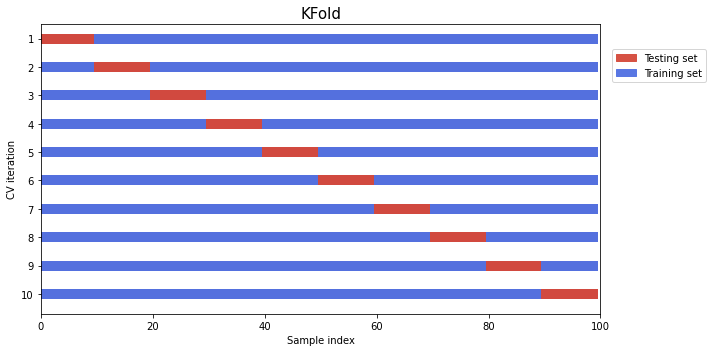

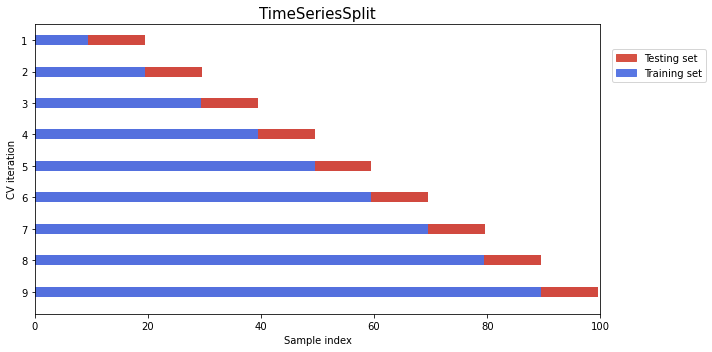

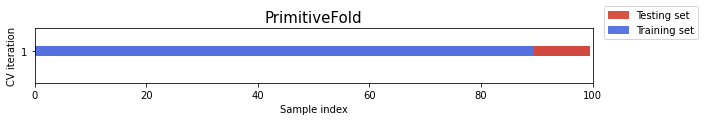

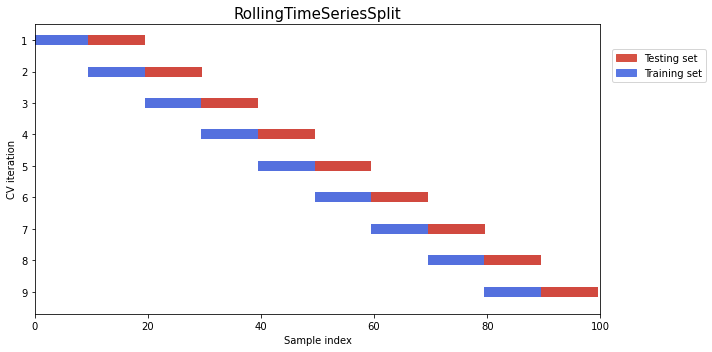

In [64]:
for name, kfold in kfolds_2.items():
    fig, ax = plt.subplots(figsize=(10, int(np.ceil(kfold.n_splits/2))))
    plotCvDiagram(kfold, ax)
    ax.legend([Patch(color=cmap_cv(0.9)), Patch(color=cmap_cv(.1))], ['Testing set', 'Training set'], loc=(1.02, .8))
    plt.tight_layout()
    #fig.subplots_adjust(right=.7)

In [65]:
%%time
param_grid_ElasticNet_2 = {'polynomialfeatures__degree': [1, 2],
                                'elasticnet__alpha': np.linspace(0, 0.1, 21),
                                'elasticnet__l1_ratio':np.linspace(0,0.05,65)}
grids_ElasticNet_2[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), ElasticNet(alpha=1, tol=0.1)),
                    param_grid=param_grid_ElasticNet_2,
                    cv=kfold,
                    refit=False,
                    scoring=scoring)
grids_ElasticNet_2[cv_name].fit(X_train_2, y_train_2)

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_las

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3563072089455388, tolerance: 1.248283426879068
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.387889506106365, tolerance: 1.248283426879068
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4170560674552906, tolerance: 1.248283426879068
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6339448403858707, tolerance: 1.248283426879068
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.492060186359161, tolerance: 3.0319377431378713
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1919725400237526, tolerance: 1.7560197392847556
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordina

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5805115090319037, tolerance: 1.4753830172885092
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7299407358273136, tolerance: 1.248283426879068
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9515357874779715, tolerance: 3.0319377431378713
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordin

CPU times: user 1min 2s, sys: 204 ms, total: 1min 2s
Wall time: 1min 2s


GridSearchCV(cv=<__main__.RollingTimeSeriesSplit object at 0x7f4473ce5940>,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('elasticnet',
                                        ElasticNet(alpha=1, tol=0.1))]),
             param_grid={'elasticnet__alpha': array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0....
       0.03125   , 0.03203125, 0.0328125 , 0.03359375, 0.034375  ,
       0.03515625, 0.0359375 , 0.03671875, 0.0375    , 0.03828125,
       0.0390625 , 0.03984375, 0.040625  , 0.04140625, 0.0421875 ,
       0.04296875, 0.04375   , 0.04453125, 0.0453125 , 0.04609375,
       0.046875  , 0.04765625, 0.0484375 , 0.04921875, 0.05      ]),
                         'polynomialfeatures__degree': [1, 2]},
             ref

In [66]:
bestParamsForMethod = bestParamsForTimeSeriesObtainedByVariousApproaches(grids_ElasticNet_2[cv_name])
toCompareBestHiperparamsWithSetOfHiperparams(bestParamsForMethod, cv_name)
grids_ElasticNet_2[cv_name].param_grid

mean(MSE)
{'elasticnet__alpha': 0.015, 'elasticnet__l1_ratio': 0.00703125, 'polynomialfeatures__degree': 1}
mean(RMSE)
{'elasticnet__alpha': 0.035, 'elasticnet__l1_ratio': 0.010937500000000001, 'polynomialfeatures__degree': 1}
harmonic_mean(MSE)
{'elasticnet__alpha': 0.035, 'elasticnet__l1_ratio': 0.00078125, 'polynomialfeatures__degree': 1}
harmonic_mean(RMSE)
{'elasticnet__alpha': 0.035, 'elasticnet__l1_ratio': 0.00078125, 'polynomialfeatures__degree': 1}
weighted_mean
{'elasticnet__alpha': 0.035, 'elasticnet__l1_ratio': 0.00078125, 'polynomialfeatures__degree': 1}


{'polynomialfeatures__degree': [1, 2],
 'elasticnet__alpha': array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
        0.09 , 0.095, 0.1  ]),
 'elasticnet__l1_ratio': array([0.        , 0.00078125, 0.0015625 , 0.00234375, 0.003125  ,
        0.00390625, 0.0046875 , 0.00546875, 0.00625   , 0.00703125,
        0.0078125 , 0.00859375, 0.009375  , 0.01015625, 0.0109375 ,
        0.01171875, 0.0125    , 0.01328125, 0.0140625 , 0.01484375,
        0.015625  , 0.01640625, 0.0171875 , 0.01796875, 0.01875   ,
        0.01953125, 0.0203125 , 0.02109375, 0.021875  , 0.02265625,
        0.0234375 , 0.02421875, 0.025     , 0.02578125, 0.0265625 ,
        0.02734375, 0.028125  , 0.02890625, 0.0296875 , 0.03046875,
        0.03125   , 0.03203125, 0.0328125 , 0.03359375, 0.034375  ,
        0.03515625, 0.0359375 , 0.03671875, 0.0375    , 0.03828125,
        0.0390625 , 0.03984375, 0.040625  , 0.04140625, 0.04218

In [67]:
%%time
param_grid_Lasso_2 = {'polynomialfeatures__degree': [1, 2],
                    'lasso__alpha': np.linspace(0, 0.5, 101)}
grids_Lasso_2[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), Lasso(alpha=1, tol=0.1)),
                    param_grid=param_grid_Lasso_2,
                    cv=kfold,
                    refit=False,
                    scoring=scoring)
grids_Lasso_2[cv_name].fit(X_train_2, y_train_2)

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

CPU times: user 4.44 s, sys: 15.9 ms, total: 4.46 s
Wall time: 4.45 s


GridSearchCV(cv=<__main__.RollingTimeSeriesSplit object at 0x7f4473ce5940>,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('lasso', Lasso(alpha=1, tol=0.1))]),
             param_grid={'lasso__alpha': array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0...
       0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
       0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
       0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
       0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
       0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
       0.495, 0.5  ]),
                         'polynomialfeatures__degree': [1, 2]},
        

In [68]:
bestParamsForMethod = bestParamsForTimeSeriesObtainedByVariousApproaches(grids_Lasso_2[cv_name])
toCompareBestHiperparamsWithSetOfHiperparams(bestParamsForMethod, cv_name)
grids_Lasso_2[cv_name].param_grid

mean(MSE)
{'lasso__alpha': 0.0, 'polynomialfeatures__degree': 1}
mean(RMSE)
{'lasso__alpha': 0.0, 'polynomialfeatures__degree': 1}
harmonic_mean(MSE)
{'lasso__alpha': 0.005, 'polynomialfeatures__degree': 1}
harmonic_mean(RMSE)
{'lasso__alpha': 0.005, 'polynomialfeatures__degree': 1}
weighted_mean
{'lasso__alpha': 0.005, 'polynomialfeatures__degree': 1}


{'polynomialfeatures__degree': [1, 2],
 'lasso__alpha': array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
        0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
        0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
        0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
        0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
        0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
        0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
        0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
        0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
        0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
        0.495, 0.5  ])}

In [69]:
%%time
param_grid_Ridge_2 = {'polynomialfeatures__degree': [1],
            'ridge__alpha':  np.linspace(0, 2, 41)}
grids_Ridge_2[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), Ridge(alpha=1, tol=0.1)),
                    param_grid=param_grid_Ridge_2,
                    cv=kfold,
                    refit=False,
                    scoring=scoring)
grids_Ridge_2[cv_name].fit(X_train_2, y_train_2)

CPU times: user 918 ms, sys: 4.22 ms, total: 922 ms
Wall time: 915 ms


GridSearchCV(cv=<__main__.RollingTimeSeriesSplit object at 0x7f4473ce5940>,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge(alpha=1, tol=0.1))]),
             param_grid={'polynomialfeatures__degree': [1],
                         'ridge__alpha': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ])},
             refit=False,
             scoring={'MSE': 'neg_mean_squared_error',
                      'RMSE': 'neg_root_mean_squared_error'})

In [70]:
bestParamsForMethod = bestParamsForTimeSeriesObtainedByVariousApproaches(grids_Ridge_2[cv_name])
toCompareBestHiperparamsWithSetOfHiperparams(bestParamsForMethod, cv_name)
grids_Ridge_2[cv_name].param_grid

mean(MSE)
{'polynomialfeatures__degree': 1, 'ridge__alpha': 0.15000000000000002}
mean(RMSE)
{'polynomialfeatures__degree': 1, 'ridge__alpha': 0.2}
harmonic_mean(MSE)
{'polynomialfeatures__degree': 1, 'ridge__alpha': 0.5}
harmonic_mean(RMSE)
{'polynomialfeatures__degree': 1, 'ridge__alpha': 0.4}
weighted_mean
{'polynomialfeatures__degree': 1, 'ridge__alpha': 0.55}


{'polynomialfeatures__degree': [1],
 'ridge__alpha': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
        1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
        1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ])}

In [71]:
%%time
param_grid_LinearR_2 = {'polynomialfeatures__degree': [1, 2]}
grids_LinearR_2[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression()),
                    param_grid=param_grid_LinearR_2,
                    cv=kfold,
                    refit=False,
                    scoring=scoring)
grids_LinearR_2[cv_name].fit(X_train_2, y_train_2)

CPU times: user 277 ms, sys: 16.2 ms, total: 293 ms
Wall time: 61.3 ms


GridSearchCV(cv=<__main__.RollingTimeSeriesSplit object at 0x7f4473ce5940>,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': [1, 2]}, refit=False,
             scoring={'MSE': 'neg_mean_squared_error',
                      'RMSE': 'neg_root_mean_squared_error'})

In [72]:
bestParamsForMethod = bestParamsForTimeSeriesObtainedByVariousApproaches(grids_LinearR_2[cv_name])
toCompareBestHiperparamsWithSetOfHiperparams(bestParamsForMethod, cv_name)
grids_LinearR_2[cv_name].param_grid

mean(MSE)
{'polynomialfeatures__degree': 1}
mean(RMSE)
{'polynomialfeatures__degree': 1}
harmonic_mean(MSE)
{'polynomialfeatures__degree': 1}
harmonic_mean(RMSE)
{'polynomialfeatures__degree': 1}
weighted_mean
{'polynomialfeatures__degree': 1}


{'polynomialfeatures__degree': [1, 2]}

In [73]:
%%time
param_grid_SVR_2 = {"svr__C": np.logspace(3, 5, 16), 
                                "svr__gamma":np.linspace(0.0000001, 0.0006001, 31)}
grids_SVR_2[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), SVR(kernel='rbf', gamma=0.1)),
                    param_grid=param_grid_SVR_2,
                    cv=kfold,
                    refit=False,
                    scoring=scoring
                     )
grids_SVR_2[cv_name].fit(X_train_2, y_train_2)

CPU times: user 17.2 s, sys: 44.1 ms, total: 17.3 s
Wall time: 16.6 s


GridSearchCV(cv=<__main__.RollingTimeSeriesSplit object at 0x7f4473ce5940>,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR(gamma=0.1))]),
             param_grid={'svr__C': array([  1000.        ,   1359.35639088,   1847.84979742,   2511.88643151,
         3414.54887383,   4641.58883361,   6309.5734448 ,   8576.95898591,
        11659.1440118 ,  15848.93192461,  21544.34690032,  29286.44564625,
        3...
                         'svr__gamma': array([1.000e-07, 2.010e-05, 4.010e-05, 6.010e-05, 8.010e-05, 1.001e-04,
       1.201e-04, 1.401e-04, 1.601e-04, 1.801e-04, 2.001e-04, 2.201e-04,
       2.401e-04, 2.601e-04, 2.801e-04, 3.001e-04, 3.201e-04, 3.401e-04,
       3.601e-04, 3.801e-04, 4.001e-04, 4.201e-04, 4.401e-04, 4.601e-04,
       4.801e-04, 5.001e-04, 5.201e-04, 5.401e-04, 5.601e-04, 5.801e-04,
       6.001e-04])},
             refit=False,
             scoring={'MSE': 'neg_mean_squared_error',
  

In [74]:
bestParamsForMethod = bestParamsForTimeSeriesObtainedByVariousApproaches(grids_SVR_2[cv_name])
toCompareBestHiperparamsWithSetOfHiperparams(bestParamsForMethod, cv_name)
grids_SVR_2[cv_name].param_grid

mean(MSE)
{'svr__C': 73564.22544596421, 'svr__gamma': 2.01e-05}
mean(RMSE)
{'svr__C': 73564.22544596421, 'svr__gamma': 2.01e-05}
harmonic_mean(MSE)
{'svr__C': 73564.22544596421, 'svr__gamma': 2.01e-05}
harmonic_mean(RMSE)
{'svr__C': 73564.22544596421, 'svr__gamma': 2.01e-05}
weighted_mean
{'svr__C': 1847.8497974222907, 'svr__gamma': 0.0006001}


{'svr__C': array([  1000.        ,   1359.35639088,   1847.84979742,   2511.88643151,
          3414.54887383,   4641.58883361,   6309.5734448 ,   8576.95898591,
         11659.1440118 ,  15848.93192461,  21544.34690032,  29286.44564625,
         39810.71705535,  54116.95265465,  73564.22544596, 100000.        ]),
 'svr__gamma': array([1.000e-07, 2.010e-05, 4.010e-05, 6.010e-05, 8.010e-05, 1.001e-04,
        1.201e-04, 1.401e-04, 1.601e-04, 1.801e-04, 2.001e-04, 2.201e-04,
        2.401e-04, 2.601e-04, 2.801e-04, 3.001e-04, 3.201e-04, 3.401e-04,
        3.601e-04, 3.801e-04, 4.001e-04, 4.201e-04, 4.401e-04, 4.601e-04,
        4.801e-04, 5.001e-04, 5.201e-04, 5.401e-04, 5.601e-04, 5.801e-04,
        6.001e-04])}

In [75]:
listOfGrids_method_2 = grids_ElasticNet_2, grids_Lasso_2, grids_Ridge_2, grids_LinearR_2, grids_SVR_2
refitModelsOfPointingCvTypeUsingListOfCalculatedGrids_method(models_2, cv_name, listOfGrids_method_2, X_train_2, y_train_2)

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.748601704471762, tolerance: 0.017194602739132727
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression e

In [76]:
outcomeOfModelsPredictionForVariousApproaches(models_2, cv_name, X_test_2, y_test_2)

KFold_10


Method        r2  explained_variance_score  \
0                   mean(MSE)_ElasticNet  0.868470                  0.875687   
1                  mean(RMSE)_ElasticNet  0.864464                  0.874130   
2          harmonic_mean(MSE)_ElasticNet  0.864334                  0.874002   
3         harmonic_mean(RMSE)_ElasticNet  0.864334                  0.874002   
4               weighted_mean_ElasticNet  0.864334                  0.874002   
5                        mean(MSE)_Lasso  0.866354                  0.871640   
6                       mean(RMSE)_Lasso  0.866354                  0.871640   
7               harmonic_mean(MSE)_Lasso  0.872260                  0.878208   
8              harmonic_mean(RMSE)_Lasso  0.872260                  0.878208   
9                    weighted_mean_Lasso  0.872260                  0.878208   
10                       mean(MSE)_Ridge  0.866653                  0.872022   
11                      mean(RMSE)_Ridge  0.866746                  0.872143   
12              harmonic_mean(MSE)_Ridge  0.867241                  0.872804   
13             harmonic_mean(RMSE)_Ridge  0.867088                  0.872595   
14                   weighted_mean_Ridge  0.867313                  0.872904   
15            mean(MSE)_LinearRegression  0.866354                  0.871640   
16           mean(RMSE)_LinearRegression  0.866354                  0.871640   
17   harmonic_mean(MSE)_LinearRegression  0.866354                  0.871640   
18  harmonic_mean(RMSE)_LinearRegression  0.866354                  0.871640   
19        weighted_mean_LinearRegression  0.866354                  0.871640   
20                         mean(MSE)_SVR  0.862927                  0.874092   
21                        mean(RMSE)_SVR  0.862927                  0.874092   
22                harmonic_mean(MSE)_SVR  0.862927                  0.874092   
23               harmonic_mean(RMSE)_SVR  0.862927                  0.874092   
24                     weighted_mean_SVR  0.835701                  0.859817   

    mean_squared_error  mean_absolute_error  
0             0.224416             0.358871  
1             0.231251             0.357555  
2             0.231473             0.357970  
3             0.231473             0.357970  
4             0.231473             0.357970  
5             0.228027             0.365180  
6             0.228027             0.365180  
7             0.217950             0.354751  
8             0.217950             0.354751  
9             0.217950             0.354751  
10            0.227517             0.364623  
11            0.227358             0.364442  
12            0.226513             0.363395  
13            0.226775             0.363737  
14            0.226390             0.363227  
15            0.228027             0.365180  
16            0.228027             0.365180  
17            0.228027             0.365180  
18            0.228027             0.365180  
19            0.228027             0.365180  
20            0.233875             0.356616  
21            0.233875             0.356616  
22            0.233875             0.356616  
23            0.233875             0.356616  
24            0.280327             0.387849

In [77]:
%%time
for cv_name, kfold in list(kfolds_2.items())[1:]:
    grids_ElasticNet_2[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2),
                                                           ElasticNet(alpha=1, tol=0.1)),
                                             param_grid=param_grid_ElasticNet_2,
                                             cv=kfold,
                                             refit=False,
                                             scoring=scoring)
    grids_ElasticNet_2[cv_name].fit(X_train_2, y_train_2)
    
    grids_Lasso_2[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2),
                                                      Lasso(alpha=1, tol=0.1)),
                                        param_grid=param_grid_Lasso_2,
                                        cv=kfold,
                                        refit=False,
                                        scoring=scoring)
    grids_Lasso_2[cv_name].fit(X_train_2, y_train_2)
    
    grids_Ridge_2[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2),
                                                      Ridge(alpha=1, tol=0.1)),
                                        param_grid=param_grid_Ridge_2,
                                        cv=kfold,
                                        refit=False,
                                        scoring=scoring)
    grids_Ridge_2[cv_name].fit(X_train_2, y_train_2)
    
    grids_LinearR_2[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2),
                                                        LinearRegression()),
                                          param_grid=param_grid_LinearR_2,
                                          cv=kfold,
                                          refit=False,
                                          scoring=scoring)
    grids_LinearR_2[cv_name].fit(X_train_2, y_train_2)
    
    grids_SVR_2[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), SVR(kernel='rbf', gamma=0.1)),
                                      param_grid=param_grid_SVR_2,
                                      cv=kfold,
                                      refit=False,
                                      scoring=scoring)
    grids_SVR_2[cv_name].fit(X_train_2, y_train_2)

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_las

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.694957231380734, tolerance: 5.625776316227301
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.254472934168394, tolerance: 7.728910211974375
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.17659753543711, tolerance: 8.908886425047834
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_de

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.143899953459709, tolerance: 5.625776316227301
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.993903538171992, tolerance: 7.728910211974375
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.034252135216134, tolerance: 8.908886425047834
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.5280365081821365, tolerance: 5.625776316227301
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.621562047412736, tolerance: 7.728910211974375
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.763879965689235, tolerance: 8.908886425047834
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.8681285993516905, tolerance: 5.625776316227301
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.173069191980652, tolerance: 7.728910211974375
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.40649721280835, tolerance: 8.908886425047834
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_las

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.349029894514267, tolerance: 15.544077632278391
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.719697278151813, tolerance: 15.544077632278391
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.075864654053547, tolerance: 15.544077632278391
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordi

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_las

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3563072089455388, tolerance: 1.248283426879068
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.387889506106365, tolerance: 1.248283426879068
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4170560674552906, tolerance: 1.248283426879068
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6339448403858707, tolerance: 1.248283426879068
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.492060186359161, tolerance: 3.0319377431378713
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1919725400237526, tolerance: 1.7560197392847556
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordina

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5805115090319037, tolerance: 1.4753830172885092
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7299407358273136, tolerance: 1.248283426879068
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9515357874779715, tolerance: 3.0319377431378713
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordin

CPU times: user 5min 24s, sys: 1.2 s, total: 5min 25s
Wall time: 5min 14s


In [648]:
listOfGrids_method_2 = grids_ElasticNet_2, grids_Lasso_2, grids_Ridge_2, grids_LinearR_2, grids_SVR_2
outcomes_2={}
for cv_name in kfolds_2:
    refitModelsOfPointingCvTypeUsingListOfCalculatedGrids_method(models_2, cv_name, listOfGrids_method_2, X_train_2, y_train_2)
    outcomes_2[cv_name] = outcomeOfModelsPredictionForVariousApproaches(models_2, cv_name, X_test_2, y_test_2)
    display(outcomes_2[cv_name])


KFold_10


/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.748601704471762, tolerance: 0.017194602739132727
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression e

Method        r2  explained_variance_score  \
0                   mean(MSE)_ElasticNet  0.868470                  0.875687   
1                  mean(RMSE)_ElasticNet  0.864464                  0.874130   
2          harmonic_mean(MSE)_ElasticNet  0.864334                  0.874002   
3         harmonic_mean(RMSE)_ElasticNet  0.864334                  0.874002   
4               weighted_mean_ElasticNet  0.864334                  0.874002   
5                        mean(MSE)_Lasso  0.866354                  0.871640   
6                       mean(RMSE)_Lasso  0.866354                  0.871640   
7               harmonic_mean(MSE)_Lasso  0.872260                  0.878208   
8              harmonic_mean(RMSE)_Lasso  0.872260                  0.878208   
9                    weighted_mean_Lasso  0.872260                  0.878208   
10                       mean(MSE)_Ridge  0.866653                  0.872022   
11                      mean(RMSE)_Ridge  0.866746                  0.872143   
12              harmonic_mean(MSE)_Ridge  0.867241                  0.872804   
13             harmonic_mean(RMSE)_Ridge  0.867088                  0.872595   
14                   weighted_mean_Ridge  0.867313                  0.872904   
15            mean(MSE)_LinearRegression  0.866354                  0.871640   
16           mean(RMSE)_LinearRegression  0.866354                  0.871640   
17   harmonic_mean(MSE)_LinearRegression  0.866354                  0.871640   
18  harmonic_mean(RMSE)_LinearRegression  0.866354                  0.871640   
19        weighted_mean_LinearRegression  0.866354                  0.871640   
20                         mean(MSE)_SVR  0.862927                  0.874092   
21                        mean(RMSE)_SVR  0.862927                  0.874092   
22                harmonic_mean(MSE)_SVR  0.862927                  0.874092   
23               harmonic_mean(RMSE)_SVR  0.862927                  0.874092   
24                     weighted_mean_SVR  0.835701                  0.859817   

    mean_squared_error  mean_absolute_error  
0             0.224416             0.358871  
1             0.231251             0.357555  
2             0.231473             0.357970  
3             0.231473             0.357970  
4             0.231473             0.357970  
5             0.228027             0.365180  
6             0.228027             0.365180  
7             0.217950             0.354751  
8             0.217950             0.354751  
9             0.217950             0.354751  
10            0.227517             0.364623  
11            0.227358             0.364442  
12            0.226513             0.363395  
13            0.226775             0.363737  
14            0.226390             0.363227  
15            0.228027             0.365180  
16            0.228027             0.365180  
17            0.228027             0.365180  
18            0.228027             0.365180  
19            0.228027             0.365180  
20            0.233875             0.356616  
21            0.233875             0.356616  
22            0.233875             0.356616  
23            0.233875             0.356616  
24            0.280327             0.387849

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.544573474310198, tolerance: 0.017194602739132727
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.877367691719527, tolerance: 0.017194602739132727
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.544573474310198, tolerance: 0.017194602739132727
  model = cd_fast.enet_coordinate_descent(


TimeSeriesSplit_9


Method        r2  explained_variance_score  \
0                   mean(MSE)_ElasticNet  0.865643                  0.874700   
1                  mean(RMSE)_ElasticNet  0.865643                  0.874700   
2          harmonic_mean(MSE)_ElasticNet  0.722220                  0.756670   
3         harmonic_mean(RMSE)_ElasticNet  0.866787                  0.875231   
4               weighted_mean_ElasticNet  0.722220                  0.756670   
5                        mean(MSE)_Lasso  0.857435                  0.865560   
6                       mean(RMSE)_Lasso  0.857435                  0.865560   
7               harmonic_mean(MSE)_Lasso  0.831042                  0.852771   
8              harmonic_mean(RMSE)_Lasso  0.831042                  0.852771   
9                    weighted_mean_Lasso  0.830324                  0.852716   
10                       mean(MSE)_Ridge  0.866836                  0.872261   
11                      mean(RMSE)_Ridge  0.867007                  0.872487   
12              harmonic_mean(MSE)_Ridge  0.867088                  0.872595   
13             harmonic_mean(RMSE)_Ridge  0.867166                  0.872701   
14                   weighted_mean_Ridge  0.867088                  0.872595   
15            mean(MSE)_LinearRegression  0.866354                  0.871640   
16           mean(RMSE)_LinearRegression  0.866354                  0.871640   
17   harmonic_mean(MSE)_LinearRegression  0.866354                  0.871640   
18  harmonic_mean(RMSE)_LinearRegression  0.866354                  0.871640   
19        weighted_mean_LinearRegression  0.866354                  0.871640   
20                         mean(MSE)_SVR  0.808431                  0.825929   
21                        mean(RMSE)_SVR  0.808431                  0.825929   
22                harmonic_mean(MSE)_SVR  0.754072                  0.766840   
23               harmonic_mean(RMSE)_SVR  0.776836                  0.798417   
24                     weighted_mean_SVR  0.754072                  0.766840   

    mean_squared_error  mean_absolute_error  
0             0.229241             0.357508  
1             0.229241             0.357508  
2             0.473949             0.527102  
3             0.227288             0.357481  
4             0.473949             0.527102  
5             0.243244             0.356116  
6             0.243244             0.356116  
7             0.288276             0.389395  
8             0.288276             0.389395  
9             0.289501             0.390937  
10            0.227204             0.364263  
11            0.226913             0.363910  
12            0.226775             0.363737  
13            0.226642             0.363565  
14            0.226775             0.363737  
15            0.228027             0.365180  
16            0.228027             0.365180  
17            0.228027             0.365180  
18            0.228027             0.365180  
19            0.228027             0.365180  
20            0.326854             0.414935  
21            0.326854             0.414935  
22            0.419602             0.489183  
23            0.380762             0.452209  
24            0.419602             0.489183

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.544573474310198, tolerance: 0.017194602739132727
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.544573474310198, tolerance: 0.017194602739132727
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.544573474310198, tolerance: 0.017194602739132727
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_

PrimitiveFold_9


Method        r2  explained_variance_score  \
0                   mean(MSE)_ElasticNet  0.722220                  0.756670   
1                  mean(RMSE)_ElasticNet  0.722220                  0.756670   
2          harmonic_mean(MSE)_ElasticNet  0.722220                  0.756670   
3         harmonic_mean(RMSE)_ElasticNet  0.722220                  0.756670   
4               weighted_mean_ElasticNet  0.722220                  0.756670   
5                        mean(MSE)_Lasso  0.833788                  0.854551   
6                       mean(RMSE)_Lasso  0.833788                  0.854551   
7               harmonic_mean(MSE)_Lasso  0.833788                  0.854551   
8              harmonic_mean(RMSE)_Lasso  0.833788                  0.854551   
9                    weighted_mean_Lasso  0.833788                  0.854551   
10                       mean(MSE)_Ridge  0.866354                  0.871640   
11                      mean(RMSE)_Ridge  0.866354                  0.871640   
12              harmonic_mean(MSE)_Ridge  0.866354                  0.871640   
13             harmonic_mean(RMSE)_Ridge  0.866354                  0.871640   
14                   weighted_mean_Ridge  0.866354                  0.871640   
15            mean(MSE)_LinearRegression  0.866354                  0.871640   
16           mean(RMSE)_LinearRegression  0.866354                  0.871640   
17   harmonic_mean(MSE)_LinearRegression  0.866354                  0.871640   
18  harmonic_mean(RMSE)_LinearRegression  0.866354                  0.871640   
19        weighted_mean_LinearRegression  0.866354                  0.871640   
20                         mean(MSE)_SVR  0.759181                  0.778416   
21                        mean(RMSE)_SVR  0.759181                  0.778416   
22                harmonic_mean(MSE)_SVR  0.759181                  0.778416   
23               harmonic_mean(RMSE)_SVR  0.759181                  0.778416   
24                     weighted_mean_SVR  0.759181                  0.778416   

    mean_squared_error  mean_absolute_error  
0             0.473949             0.527102  
1             0.473949             0.527102  
2             0.473949             0.527102  
3             0.473949             0.527102  
4             0.473949             0.527102  
5             0.283591             0.386542  
6             0.283591             0.386542  
7             0.283591             0.386542  
8             0.283591             0.386542  
9             0.283591             0.386542  
10            0.228027             0.365180  
11            0.228027             0.365180  
12            0.228027             0.365180  
13            0.228027             0.365180  
14            0.228027             0.365180  
15            0.228027             0.365180  
16            0.228027             0.365180  
17            0.228027             0.365180  
18            0.228027             0.365180  
19            0.228027             0.365180  
20            0.410885             0.470692  
21            0.410885             0.470692  
22            0.410885             0.470692  
23            0.410885             0.470692  
24            0.410885             0.470692

RollingTSS_9


/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.748601704471762, tolerance: 0.017194602739132727
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression e

Method        r2  explained_variance_score  \
0                   mean(MSE)_ElasticNet  0.868470                  0.875687   
1                  mean(RMSE)_ElasticNet  0.864464                  0.874130   
2          harmonic_mean(MSE)_ElasticNet  0.864334                  0.874002   
3         harmonic_mean(RMSE)_ElasticNet  0.864334                  0.874002   
4               weighted_mean_ElasticNet  0.864334                  0.874002   
5                        mean(MSE)_Lasso  0.866354                  0.871640   
6                       mean(RMSE)_Lasso  0.866354                  0.871640   
7               harmonic_mean(MSE)_Lasso  0.872260                  0.878208   
8              harmonic_mean(RMSE)_Lasso  0.872260                  0.878208   
9                    weighted_mean_Lasso  0.872260                  0.878208   
10                       mean(MSE)_Ridge  0.866653                  0.872022   
11                      mean(RMSE)_Ridge  0.866746                  0.872143   
12              harmonic_mean(MSE)_Ridge  0.867241                  0.872804   
13             harmonic_mean(RMSE)_Ridge  0.867088                  0.872595   
14                   weighted_mean_Ridge  0.867313                  0.872904   
15            mean(MSE)_LinearRegression  0.866354                  0.871640   
16           mean(RMSE)_LinearRegression  0.866354                  0.871640   
17   harmonic_mean(MSE)_LinearRegression  0.866354                  0.871640   
18  harmonic_mean(RMSE)_LinearRegression  0.866354                  0.871640   
19        weighted_mean_LinearRegression  0.866354                  0.871640   
20                         mean(MSE)_SVR  0.862927                  0.874092   
21                        mean(RMSE)_SVR  0.862927                  0.874092   
22                harmonic_mean(MSE)_SVR  0.862927                  0.874092   
23               harmonic_mean(RMSE)_SVR  0.862927                  0.874092   
24                     weighted_mean_SVR  0.835701                  0.859817   

    mean_squared_error  mean_absolute_error  
0             0.224416             0.358871  
1             0.231251             0.357555  
2             0.231473             0.357970  
3             0.231473             0.357970  
4             0.231473             0.357970  
5             0.228027             0.365180  
6             0.228027             0.365180  
7             0.217950             0.354751  
8             0.217950             0.354751  
9             0.217950             0.354751  
10            0.227517             0.364623  
11            0.227358             0.364442  
12            0.226513             0.363395  
13            0.226775             0.363737  
14            0.226390             0.363227  
15            0.228027             0.365180  
16            0.228027             0.365180  
17            0.228027             0.365180  
18            0.228027             0.365180  
19            0.228027             0.365180  
20            0.233875             0.356616  
21            0.233875             0.356616  
22            0.233875             0.356616  
23            0.233875             0.356616  
24            0.280327             0.387849

In [81]:
np.std(series), np.std(series_2)

(1.0, 0.9999999999999999)

In [82]:
series.shape, series_2.shape

((3647,), (309,))

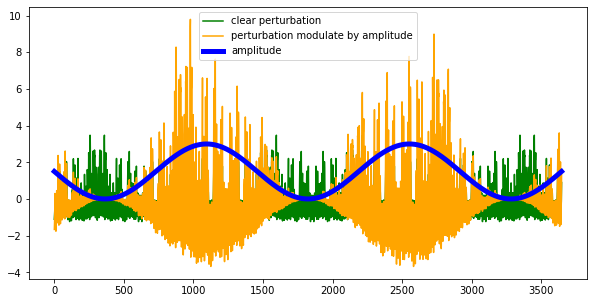

In [438]:
plt.figure(figsize=(10,5))

#clear perturbution
perturbation = np.fromiter(iter(d for i in range(12) for d in series_2[::-1 if i%2 else 1]), float)[:len(series)]
plt.plot(perturbation, 'g', label = 'clear perturbation')

#amplitude
levelOfPerturbution = 1.5 #2. #3. 
periodNumberOfPerturbution = 2.5
amplitude = (1 - np.sin(periodNumberOfPerturbution*(2*np.pi)*np.linspace(0,1,len(series))))*levelOfPerturbution
#signal.gaussian(len(series), std=len(series)/15)*levelOfPerturbution

#periodic perturbation modulate by periodic amplitude
perturbation *= amplitude
plt.plot(perturbation, 'orange', label='perturbation modulate by amplitude')

plt.plot(amplitude, 'b', lw=5, label='amplitude')
plt.legend()

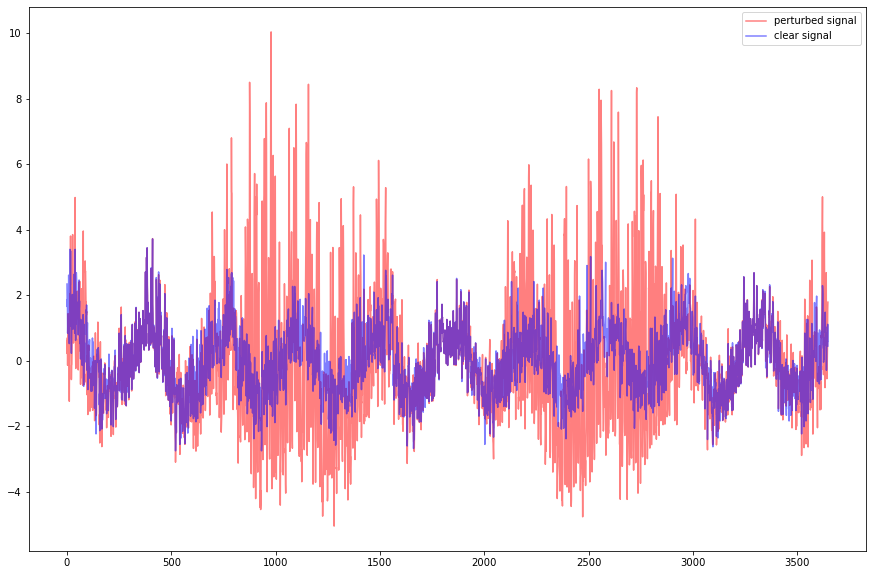

In [439]:
plt.figure(figsize=(15,10))
series_3 = series+perturbation
plt.plot(series_3, 'r', label='perturbed signal', alpha=0.5)
plt.plot(series, 'b', label='clear signal', alpha=0.5)
plt.legend()

In [404]:
resultsAR_3 = []
for order in range(1,21):
    model = sm.tsa.ARMA(series_3, (order,0))
    resultsAR_3.append(model.fit())

bic_criteria_3 = [result.bic for result in resultsAR_3]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.80315D-01    |proj g|=  1.11011D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      6      1     0     0   0.000D+00   8.803D-01
  F =  0.88031471413174445     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.1

/home/marsob/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.11514D-01    |proj g|=  1.11022D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      8      1     0     0   1.110D-08   7.115D-01
  F =  0.71151361143639580     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.03933D-01    |proj g|=  1.56131D-04


 This problem is unconstrained.



At iterate    5    f=  7.03933D-01    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     11      1     0     0   1.110D-08   7.039D-01
  F =  0.70393324556396220     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.03718D-01    |proj g|=  1.78091D-04

At iterate    5    f=  7.03718D-01    |proj g|=  1.22125D-07

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.02047D-01    |proj g|=  2.18792D-04

At iterate    5    f=  7.02047D-01    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      7     10      1     0     0   1.110D-08   7.020D-01
  F =  0.70204651335675672     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.91169D-01    |proj g|=  2.40075D-04

At iterate    5    f=  6.91169D-01    |proj g|=  4.10783D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      8     14      1     0     0   1.110D-08   6.912D-01
  F =  0.69116875445278159     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.67793D-01    |proj g|=  2.70761D-04

At iterate    5    f=  6.67792D-01    |proj g|=  1.68865D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      9     11      1     0     0   2.220D-08   6.678D-01
  F =  0.66779207967841736     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  6.43345D-01    |proj g|=  1.02029D-05

At iterate   10    f=  6.43345D-01    |proj g|=  1.22125D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     12     15      1     0     0   4.441D-08   6.433D-01
  F =  0.64334539701007887     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.19921D-01    |proj g|=  2.93632D-04


 This problem is unconstrained.



At iterate    5    f=  6.19920D-01    |proj g|=  9.16711D-05

At iterate   10    f=  6.19919D-01    |proj g|=  2.73115D-06

At iterate   15    f=  6.19919D-01    |proj g|=  1.11022D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     15     20      1     0     0   1.110D-08   6.199D-01
  F =  0.61991944279333100     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.18377D-01    |proj g|=  3.67606D-04

At iterate    5    f=  6.18376D-01    |proj g|=  1.52789D-04

At iterate   10    f=  6.18375D-01    |proj g|=  7.78266D-06

At iterate   15    f=  6.18375D-01    |proj g|=  7.77156D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     16     19      1     0     0   1.776D-07   6.184D-01
  F =  0.61837538471708975     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  6.18098D-01    |proj g|=  1.42075D-04

At iterate   10    f=  6.18098D-01    |proj g|=  6.63913D-06

At iterate   15    f=  6.18098D-01    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     18     21      1     0     0   3.331D-08   6.181D-01
  F =  0.61809786880248907     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.17985D-01    |proj g|=  3.45690D-04


 This problem is unconstrained.



At iterate    5    f=  6.17983D-01    |proj g|=  4.45533D-05

At iterate   10    f=  6.17983D-01    |proj g|=  6.77236D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     13     18      1     0     0   3.331D-08   6.180D-01
  F =  0.61798332547270707     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.17958D-01    |proj g|=  3.50275D-04

At iterate    5    f=  6.17956D-01    |proj g|=  3.19522D-05

At iterate   10    f=  6.17956D-01    |proj g|=  5.44009D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     12     14      1     0     0   4.441D-08   6.180D-01
  F =  0.61795645896101858     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.17305D-01    |proj g|=  4.08584D-04

At iterate    5    f=  6.17303D-01    |proj g|=  4.06342D-05

At iterate   10    f=  6.17303D-01    |proj g|=  1.78746D-06

At iterate   15    f=  6.17303D-01    |proj g|=  5.55112D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     17     20      1     0     0   3.331D-08   6.173D-01
  F =  0.61730289627963508     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  6.17208D-01    |proj g|=  3.89910D-05

At iterate   10    f=  6.17208D-01    |proj g|=  1.57652D-06

At iterate   15    f=  6.17208D-01    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     17     19      1     0     0   2.220D-08   6.172D-01
  F =  0.61720827302786696     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.16632D-01    |proj g|=  4.69413D-04


 This problem is unconstrained.



At iterate    5    f=  6.16630D-01    |proj g|=  1.02529D-04

At iterate   10    f=  6.16630D-01    |proj g|=  9.32587D-07

At iterate   15    f=  6.16630D-01    |proj g|=  5.55112D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     15     19      1     0     0   5.551D-08   6.166D-01
  F =  0.61662997933418617     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.10622D-01    |proj g|=  3.12672D-04


 This problem is unconstrained.



At iterate    5    f=  6.10620D-01    |proj g|=  9.56568D-05

At iterate   10    f=  6.10620D-01    |proj g|=  4.70735D-06

At iterate   15    f=  6.10620D-01    |proj g|=  1.55431D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     17     21      1     0     0   1.110D-07   6.106D-01
  F =  0.61061989919732684     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.08994D-01    |proj g|=  6.23013D-04

At iterate    5    f=  6.08991D-01    |proj g|=  1.33915D-04

At iterate   10    f=  6.08991D-01    |proj g|=  4.13003D-06

At iterate   15    f=  6.08991D-01    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19     16     19      1     0     0   4.441D-08   6.090D-01
  F =  0.60899077964061965     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  6.08835D-01    |proj g|=  9.95759D-05

At iterate   10    f=  6.08835D-01    |proj g|=  4.51861D-06

At iterate   15    f=  6.08835D-01    |proj g|=  3.33067D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20     15     17      1     0     0   3.331D-08   6.088D-01
  F =  0.60883479726626510     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.08329D-01    |proj g|=  7.29328D-04

At iterate    5    f=  6.08324D-01    |proj g|=  8.90066D-05

At iterate   10    f=  6.08324D-01    |proj g|=  5.00711D-06

At iterate   15    f=  6.08324D-01    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     16     18      1     0     0   5.551D-08   6.083D-01
  F =  0.60832417155961604     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


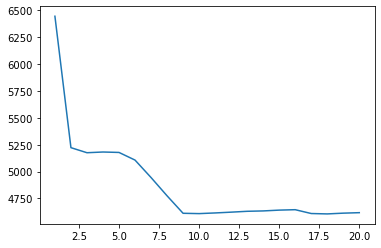

In [405]:
plt.plot(range(1,len(bic_criteria_3)+1),bic_criteria_3)

In [440]:
orderOfModel_3 = np.argmin(bic_criteria_3)+1
orderOfModel_3

18

In [441]:
# as the nature of case studied is known: series_3 is perturbed `series` with natural period equal 12 (in monthly scale),
# so instead of 11 for 'orderOfModel_3' I use 12
orderOfModel_3 = 12

In [442]:
# to compare the prediction results for different time series, the series is normalized 
series_3 -= series_3.mean()
series_3 /= np.std(series_3)

series_train_3, series_test_3 = train_test_split(series_3, test_size=0.20, random_state=42, shuffle=False)

In [443]:
df_train_3 = pd.DataFrame()
df_train_3['t'] = [x for x in series_train_3]
dataframe_train_3 = series_to_supervised(df_train_3, orderOfModel_3)
dataframe_train_3.head()

var1(t-12)  var1(t-11)  var1(t-10)  var1(t-9)  var1(t-8)  var1(t-7)  \
12    0.358871    0.117114    0.333402  -0.072049   0.334504   0.755455   
13    0.117114    0.333402   -0.072049   0.334504   0.755455   0.203831   
14    0.333402   -0.072049    0.334504   0.755455   0.203831   0.242221   
15   -0.072049    0.334504    0.755455   0.203831   0.242221   0.625316   
16    0.334504    0.755455    0.203831   0.242221   0.625316   0.358434   

    var1(t-6)  var1(t-5)  var1(t-4)  var1(t-3)  var1(t-2)  var1(t-1)   var1(t)  
12   0.203831   0.242221   0.625316   0.358434  -0.222687  -0.649449 -0.205675  
13   0.242221   0.625316   0.358434  -0.222687  -0.649449  -0.205675  0.455930  
14   0.625316   0.358434  -0.222687  -0.649449  -0.205675   0.455930  1.077400  
15   0.358434  -0.222687  -0.649449  -0.205675   0.455930   1.077400  0.816562  
16  -0.222687  -0.649449  -0.205675   0.455930   1.077400   0.816562  1.168709

In [444]:
df_test_3 = pd.DataFrame()
df_test_3['t'] = [x for x in series_test_3]
dataframe_test_3 = series_to_supervised(df_test_3, orderOfModel_3)
dataframe_test_3.head()

var1(t-12)  var1(t-11)  var1(t-10)  var1(t-9)  var1(t-8)  var1(t-7)  \
12    1.414381    1.997084    2.671154   1.193722  -0.190591  -1.025822   
13    1.997084    2.671154    1.193722  -0.190591  -1.025822  -0.502335   
14    2.671154    1.193722   -0.190591  -1.025822  -0.502335   0.221338   
15    1.193722   -0.190591   -1.025822  -0.502335   0.221338   0.610944   
16   -0.190591   -1.025822   -0.502335   0.221338   0.610944   0.205894   

    var1(t-6)  var1(t-5)  var1(t-4)  var1(t-3)  var1(t-2)  var1(t-1)   var1(t)  
12  -0.502335   0.221338   0.610944   0.205894   0.358622   0.848945  0.970517  
13   0.221338   0.610944   0.205894   0.358622   0.848945   0.970517  1.097950  
14   0.610944   0.205894   0.358622   0.848945   0.970517   1.097950  0.884436  
15   0.205894   0.358622   0.848945   0.970517   1.097950   0.884436  0.570491  
16   0.358622   0.848945   0.970517   1.097950   0.884436   0.570491 -0.123071

In [445]:
# split into input and output
X_train_3, y_train_3 = dataframe_train_3.values[:,:-1], dataframe_train_3.values[:,-1]
X_test_3, y_test_3 = dataframe_test_3.values[:,:-1], dataframe_test_3.values[:,-1]

X_train_3.shape, y_train_3.shape, X_test_3.shape, y_test_3.shape

((2905, 12), (2905,), (718, 12), (718,))

In [446]:
models_3={}
grids_ElasticNet_3, grids_Lasso_3, grids_Ridge_3, grids_LinearR_3, grids_SVR_3 = {}, {}, {}, {}, {}

In [447]:
kfolds_3 = {'KFold_10':KFold(n_splits=10, shuffle=False), 'TimeSeriesSplit_9':TimeSeriesSplit(n_splits=9),
          'PrimitiveFold_9':PrimitiveFold(ratioTrainTest=9), 'RollingTSS_9' :RollingTimeSeriesSplit(n_splits=9)}

cv_name = list(kfolds_3.keys())[0]
kfold = kfolds_3[cv_name] 
print(f'kfold type used to find a reasonable set of hiperparameters : {cv_name}')


scoring = {'MSE': 'neg_mean_squared_error', 'RMSE': 'neg_root_mean_squared_error'}

kfold type used to find a reasonable set of hiperparameters : KFold_10


/tmp/ipykernel_27891/1970827576.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


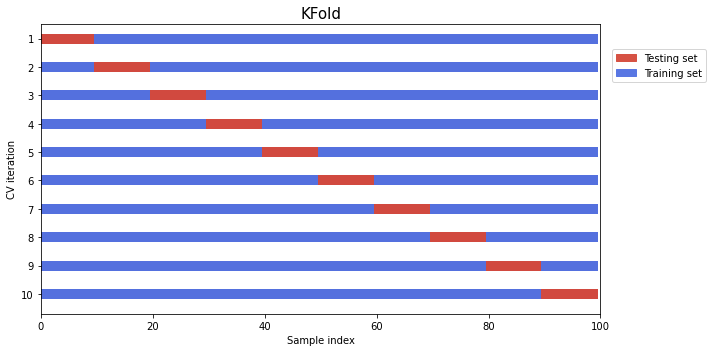

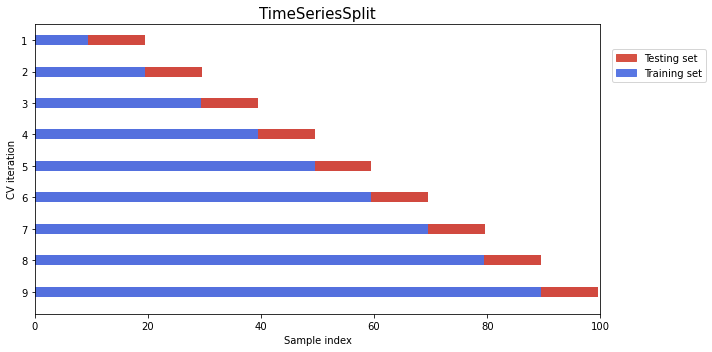

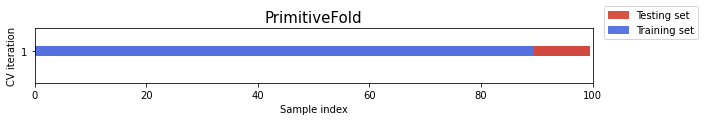

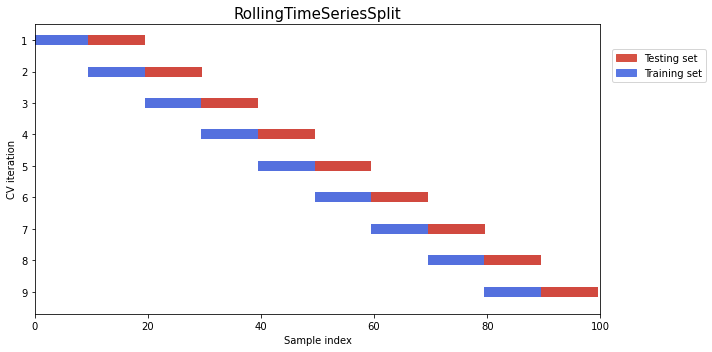

In [448]:
for name, kfold in kfolds_3.items():
    fig, ax = plt.subplots(figsize=(10, int(np.ceil(kfold.n_splits/2))))
    plotCvDiagram(kfold, ax)
    ax.legend([Patch(color=cmap_cv(0.9)), Patch(color=cmap_cv(.1))], ['Testing set', 'Training set'], loc=(1.02, .8))
    plt.tight_layout()
    #fig.subplots_adjust(right=.7)

In [449]:
%%time
param_grid_ElasticNet_3 = {'polynomialfeatures__degree': [1, 2],
                                'elasticnet__alpha': np.linspace(0, 0.0625, 17),
                                'elasticnet__l1_ratio':np.linspace(0,0.250,17)
                        }
grids_ElasticNet_3[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), ElasticNet(alpha=1, tol=0.1)),
                    param_grid=param_grid_ElasticNet_3,
                    cv=kfold,
                    refit=False,
                    scoring=scoring)
grids_ElasticNet_3[cv_name].fit(X_train_3, y_train_3)

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.937344904299618, tolerance: 12.327199891607055
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression est

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.053752923742838, tolerance: 6.683725320072596
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estim

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.02177712828015, tolerance: 27.63026880093226
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estim

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.053752923742838, tolerance: 6.683725320072596
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estim

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.388265163158747, tolerance: 6.683725320072596
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression esti

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.053752923742838, tolerance: 6.683725320072596
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estim

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.965126997314583, tolerance: 12.327199891607055
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression est

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.918164958173591, tolerance: 11.88978365996119
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_las

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.452588157216105, tolerance: 19.789210164991875
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.44454977585992, tolerance: 6.683725320072596
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.51287063717232, tolerance: 27.515371135627937
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinat

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.62392235077006, tolerance: 12.327199891607055
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.64251363313572, tolerance: 11.88978365996119
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.45982816855619, tolerance: 27.63026880093226
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.55867133400228, tolerance: 6.683725320072596
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.74731773449398, tolerance: 27.515371135627937
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.990254599099877, tolerance: 12.327199891607055
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.480432326502346, tolerance: 36.389652329373696
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.813720001576518, tolerance: 6.683725320072596
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.535174373230397, tolerance: 27.515371135627937
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordina

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.70148284082844, tolerance: 36.389652329373696
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.035816983511348, tolerance: 6.683725320072596
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.250002986597313, tolerance: 27.515371135627937
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordina

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.82146060995335, tolerance: 36.389652329373696
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.23327239421903, tolerance: 6.683725320072596
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.90882160674936, tolerance: 27.515371135627937
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.861912722925226, tolerance: 36.389652329373696
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.94851651617716, tolerance: 19.789210164991875
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.411563416859494, tolerance: 6.683725320072596
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordina

CPU times: user 3min 9s, sys: 12.2 s, total: 3min 21s
Wall time: 25.2 s


GridSearchCV(cv=<__main__.RollingTimeSeriesSplit object at 0x7f444da66d60>,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('elasticnet',
                                        ElasticNet(alpha=1, tol=0.1))]),
             param_grid={'elasticnet__alpha': array([0.        , 0.00390625, 0.0078125 , 0.01171875, 0.015625  ,
       0.01953125, 0.0234375 , 0.02734375, 0.03125   , 0.03...
       0.0390625 , 0.04296875, 0.046875  , 0.05078125, 0.0546875 ,
       0.05859375, 0.0625    ]),
                         'elasticnet__l1_ratio': array([0.      , 0.015625, 0.03125 , 0.046875, 0.0625  , 0.078125,
       0.09375 , 0.109375, 0.125   , 0.140625, 0.15625 , 0.171875,
       0.1875  , 0.203125, 0.21875 , 0.234375, 0.25    ]),
                         'polynomialfeatures__degree': [1, 2]},
             

In [450]:
bestParamsForMethod = bestParamsForTimeSeriesObtainedByVariousApproaches(grids_ElasticNet_3[cv_name])
toCompareBestHiperparamsWithSetOfHiperparams(bestParamsForMethod, cv_name)
grids_ElasticNet_3[cv_name].param_grid

mean(MSE)
{'elasticnet__alpha': 0.00390625, 'elasticnet__l1_ratio': 0.03125, 'polynomialfeatures__degree': 1}
mean(RMSE)
{'elasticnet__alpha': 0.00390625, 'elasticnet__l1_ratio': 0.03125, 'polynomialfeatures__degree': 1}
harmonic_mean(MSE)
{'elasticnet__alpha': 0.01171875, 'elasticnet__l1_ratio': 0.015625, 'polynomialfeatures__degree': 1}
harmonic_mean(RMSE)
{'elasticnet__alpha': 0.01171875, 'elasticnet__l1_ratio': 0.015625, 'polynomialfeatures__degree': 1}
weighted_mean
{'elasticnet__alpha': 0.01953125, 'elasticnet__l1_ratio': 0.015625, 'polynomialfeatures__degree': 1}


{'polynomialfeatures__degree': [1, 2],
 'elasticnet__alpha': array([0.        , 0.00390625, 0.0078125 , 0.01171875, 0.015625  ,
        0.01953125, 0.0234375 , 0.02734375, 0.03125   , 0.03515625,
        0.0390625 , 0.04296875, 0.046875  , 0.05078125, 0.0546875 ,
        0.05859375, 0.0625    ]),
 'elasticnet__l1_ratio': array([0.      , 0.015625, 0.03125 , 0.046875, 0.0625  , 0.078125,
        0.09375 , 0.109375, 0.125   , 0.140625, 0.15625 , 0.171875,
        0.1875  , 0.203125, 0.21875 , 0.234375, 0.25    ])}

In [451]:
%%time
param_grid_Lasso_3={'polynomialfeatures__degree': [1, 2],
            'lasso__alpha': np.linspace(0, 0.03, 51)
           }
grids_Lasso_3[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), Lasso(alpha=1, tol=0.1)),
                    param_grid=param_grid_Lasso_3,
                    cv=kfold,
                    refit=False,
                    scoring=scoring)
grids_Lasso_3[cv_name].fit(X_train_3, y_train_3)

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.937344904299618, tolerance: 12.327199891607055
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression est

CPU times: user 28.5 s, sys: 2.09 s, total: 30.6 s
Wall time: 3.83 s


GridSearchCV(cv=<__main__.RollingTimeSeriesSplit object at 0x7f444da66d60>,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('lasso', Lasso(alpha=1, tol=0.1))]),
             param_grid={'lasso__alpha': array([0.    , 0.0006, 0.0012, 0.0018, 0.0024, 0.003 , 0.0036, 0.0042,
       0.0048, 0.0054, 0.006 , 0.0066, 0.0072, 0.0078, 0.0084, 0.009 ,
       0.0096, 0.0102, 0.0108, 0.0114, 0.012 , 0.0126, 0.0132, 0.0138,
       0.0144, 0.015 , 0.0156, 0.0162, 0.0168, 0.0174, 0.018 , 0.0186,
       0.0192, 0.0198, 0.0204, 0.021 , 0.0216, 0.0222, 0.0228, 0.0234,
       0.024 , 0.0246, 0.0252, 0.0258, 0.0264, 0.027 , 0.0276, 0.0282,
       0.0288, 0.0294, 0.03  ]),
                         'polynomialfeatures__degree': [1, 2]},
             refit=False,
             scoring={'MSE': 'neg_mean_squared_error',


In [452]:
bestParamsForMethod = bestParamsForTimeSeriesObtainedByVariousApproaches(grids_Lasso_3[cv_name])
toCompareBestHiperparamsWithSetOfHiperparams(bestParamsForMethod, cv_name)
grids_Lasso_3[cv_name].param_grid

mean(MSE)
{'lasso__alpha': 0.0, 'polynomialfeatures__degree': 1}
mean(RMSE)
{'lasso__alpha': 0.0, 'polynomialfeatures__degree': 1}
harmonic_mean(MSE)
{'lasso__alpha': 0.0, 'polynomialfeatures__degree': 1}
harmonic_mean(RMSE)
{'lasso__alpha': 0.0, 'polynomialfeatures__degree': 1}
weighted_mean
{'lasso__alpha': 0.0, 'polynomialfeatures__degree': 1}


{'polynomialfeatures__degree': [1, 2],
 'lasso__alpha': array([0.    , 0.0006, 0.0012, 0.0018, 0.0024, 0.003 , 0.0036, 0.0042,
        0.0048, 0.0054, 0.006 , 0.0066, 0.0072, 0.0078, 0.0084, 0.009 ,
        0.0096, 0.0102, 0.0108, 0.0114, 0.012 , 0.0126, 0.0132, 0.0138,
        0.0144, 0.015 , 0.0156, 0.0162, 0.0168, 0.0174, 0.018 , 0.0186,
        0.0192, 0.0198, 0.0204, 0.021 , 0.0216, 0.0222, 0.0228, 0.0234,
        0.024 , 0.0246, 0.0252, 0.0258, 0.0264, 0.027 , 0.0276, 0.0282,
        0.0288, 0.0294, 0.03  ])}

In [453]:
%%time
param_grid_Ridge_3 = {'polynomialfeatures__degree': [1, 2],
            'ridge__alpha':  np.linspace(5,25,41)
           }
grids_Ridge_3[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), Ridge(alpha=1, tol=0.1)),
                    param_grid=param_grid_Ridge_3,
                    cv=kfold,
                    refit=False,
                    scoring=scoring)
grids_Ridge_3[cv_name].fit(X_train_3, y_train_3)

CPU times: user 16.4 s, sys: 1.1 s, total: 17.5 s
Wall time: 2.19 s


GridSearchCV(cv=<__main__.RollingTimeSeriesSplit object at 0x7f444da66d60>,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge(alpha=1, tol=0.1))]),
             param_grid={'polynomialfeatures__degree': [1, 2],
                         'ridge__alpha': array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ,
       10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5,
       16. , 16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. ,
       21.5, 22. , 22.5, 23. , 23.5, 24. , 24.5, 25. ])},
             refit=False,
             scoring={'MSE': 'neg_mean_squared_error',
                      'RMSE': 'neg_root_mean_squared_error'})

In [454]:
bestParamsForMethod = bestParamsForTimeSeriesObtainedByVariousApproaches(grids_Ridge_3[cv_name])
toCompareBestHiperparamsWithSetOfHiperparams(bestParamsForMethod, cv_name)
grids_Ridge_3[cv_name].param_grid

mean(MSE)
{'polynomialfeatures__degree': 1, 'ridge__alpha': 5.0}
mean(RMSE)
{'polynomialfeatures__degree': 1, 'ridge__alpha': 5.0}
harmonic_mean(MSE)
{'polynomialfeatures__degree': 1, 'ridge__alpha': 5.5}
harmonic_mean(RMSE)
{'polynomialfeatures__degree': 1, 'ridge__alpha': 5.0}
weighted_mean
{'polynomialfeatures__degree': 1, 'ridge__alpha': 7.5}


{'polynomialfeatures__degree': [1, 2],
 'ridge__alpha': array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ,
        10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5,
        16. , 16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. ,
        21.5, 22. , 22.5, 23. , 23.5, 24. , 24.5, 25. ])}

In [455]:
%%time
param_grid_LinearR_3 = {'polynomialfeatures__degree': [1, 2]}
grids_LinearR_3[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression()),
                    param_grid=param_grid_LinearR_3,
                    cv=kfold,
                    refit=False,
                    scoring=scoring)
grids_LinearR_3[cv_name].fit(X_train_3, y_train_3)

CPU times: user 677 ms, sys: 36.2 ms, total: 713 ms
Wall time: 89.1 ms


GridSearchCV(cv=<__main__.RollingTimeSeriesSplit object at 0x7f444da66d60>,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': [1, 2]}, refit=False,
             scoring={'MSE': 'neg_mean_squared_error',
                      'RMSE': 'neg_root_mean_squared_error'})

In [456]:
bestParamsForMethod = bestParamsForTimeSeriesObtainedByVariousApproaches(grids_LinearR_3[cv_name])
toCompareBestHiperparamsWithSetOfHiperparams(bestParamsForMethod, cv_name)
grids_LinearR_3[cv_name].param_grid

mean(MSE)
{'polynomialfeatures__degree': 1}
mean(RMSE)
{'polynomialfeatures__degree': 1}
harmonic_mean(MSE)
{'polynomialfeatures__degree': 1}
harmonic_mean(RMSE)
{'polynomialfeatures__degree': 1}
weighted_mean
{'polynomialfeatures__degree': 1}


{'polynomialfeatures__degree': [1, 2]}

In [457]:
%%time
param_grid_SVR_3 = {"svr__C": np.linspace(100, 220, 31), 
                                "svr__gamma":np.linspace(0.00015, 0.00045, 31)}
grids_SVR_3[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), SVR(kernel='rbf', gamma=0.1)),
                    param_grid=param_grid_SVR_3,
                    cv=kfold,
                    refit=False,
                    scoring=scoring
                     )
grids_SVR_3[cv_name].fit(X_train_3, y_train_3)

CPU times: user 2min 2s, sys: 77.9 ms, total: 2min 2s
Wall time: 2min 2s


GridSearchCV(cv=<__main__.RollingTimeSeriesSplit object at 0x7f444da66d60>,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR(gamma=0.1))]),
             param_grid={'svr__C': array([100., 104., 108., 112., 116., 120., 124., 128., 132., 136., 140.,
       144., 148., 152., 156., 160., 164., 168., 172., 176., 180., 184.,
       188., 192., 196., 200., 204., 208., 212., 216., 220.]),
                         'svr__gamma': array([0.00015, 0.00016, 0.00017, 0.00018, 0.00019, 0.0002 , 0.00021,
       0.00022, 0.00023, 0.00024, 0.00025, 0.00026, 0.00027, 0.00028,
       0.00029, 0.0003 , 0.00031, 0.00032, 0.00033, 0.00034, 0.00035,
       0.00036, 0.00037, 0.00038, 0.00039, 0.0004 , 0.00041, 0.00042,
       0.00043, 0.00044, 0.00045])},
             refit=False,
             scoring={'MSE': 'neg_mean_squared_error',
                      'RMSE': 'neg_root_mean_squared_error'})

In [458]:
bestParamsForMethod = bestParamsForTimeSeriesObtainedByVariousApproaches(grids_SVR_3[cv_name])
toCompareBestHiperparamsWithSetOfHiperparams(bestParamsForMethod, cv_name)
grids_SVR_3[cv_name].param_grid

mean(MSE)
{'svr__C': 220.0, 'svr__gamma': 0.00015}
mean(RMSE)
{'svr__C': 220.0, 'svr__gamma': 0.00015}
harmonic_mean(MSE)
{'svr__C': 212.0, 'svr__gamma': 0.00015}
harmonic_mean(RMSE)
{'svr__C': 212.0, 'svr__gamma': 0.00015}
weighted_mean
{'svr__C': 208.0, 'svr__gamma': 0.00015}


{'svr__C': array([100., 104., 108., 112., 116., 120., 124., 128., 132., 136., 140.,
        144., 148., 152., 156., 160., 164., 168., 172., 176., 180., 184.,
        188., 192., 196., 200., 204., 208., 212., 216., 220.]),
 'svr__gamma': array([0.00015, 0.00016, 0.00017, 0.00018, 0.00019, 0.0002 , 0.00021,
        0.00022, 0.00023, 0.00024, 0.00025, 0.00026, 0.00027, 0.00028,
        0.00029, 0.0003 , 0.00031, 0.00032, 0.00033, 0.00034, 0.00035,
        0.00036, 0.00037, 0.00038, 0.00039, 0.0004 , 0.00041, 0.00042,
        0.00043, 0.00044, 0.00045])}

In [459]:
# using calculated grids for a given cross-validation type and training data I creat best models
# from best hiperparams and refit it using training data.  
listOfGrids_method_3 = grids_ElasticNet_3, grids_Lasso_3, grids_Ridge_3, grids_LinearR_3, grids_SVR_3
refitModelsOfPointingCvTypeUsingListOfCalculatedGrids_method(models_3, cv_name, listOfGrids_method_3, X_train_3, y_train_3)

outcomeOfModelsPredictionForVariousApproaches(models_3, cv_name, X_test_3, y_test_3)

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375.37016791446734, tolerance: 0.3344693205456525
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression est

KFold_10


Method        r2  explained_variance_score  \
0                   mean(MSE)_ElasticNet  0.693992                  0.694013   
1                  mean(RMSE)_ElasticNet  0.693992                  0.694013   
2          harmonic_mean(MSE)_ElasticNet  0.696046                  0.696068   
3         harmonic_mean(RMSE)_ElasticNet  0.696046                  0.696068   
4               weighted_mean_ElasticNet  0.697200                  0.697224   
5                        mean(MSE)_Lasso  0.692490                  0.692510   
6                       mean(RMSE)_Lasso  0.692490                  0.692510   
7               harmonic_mean(MSE)_Lasso  0.692490                  0.692510   
8              harmonic_mean(RMSE)_Lasso  0.692490                  0.692510   
9                    weighted_mean_Lasso  0.692490                  0.692510   
10                       mean(MSE)_Ridge  0.693201                  0.693222   
11                      mean(RMSE)_Ridge  0.693201                  0.693222   
12              harmonic_mean(MSE)_Ridge  0.693268                  0.693289   
13             harmonic_mean(RMSE)_Ridge  0.693201                  0.693222   
14                   weighted_mean_Ridge  0.693528                  0.693549   
15            mean(MSE)_LinearRegression  0.692490                  0.692510   
16           mean(RMSE)_LinearRegression  0.692490                  0.692510   
17   harmonic_mean(MSE)_LinearRegression  0.692490                  0.692510   
18  harmonic_mean(RMSE)_LinearRegression  0.692490                  0.692510   
19        weighted_mean_LinearRegression  0.692490                  0.692510   
20                         mean(MSE)_SVR  0.703428                  0.703457   
21                        mean(RMSE)_SVR  0.703428                  0.703457   
22                harmonic_mean(MSE)_SVR  0.703505                  0.703538   
23               harmonic_mean(RMSE)_SVR  0.703505                  0.703538   
24                     weighted_mean_SVR  0.703510                  0.703544   

    mean_squared_error  mean_absolute_error  
0             0.120505             0.270253  
1             0.120505             0.270253  
2             0.119696             0.268525  
3             0.119696             0.268525  
4             0.119241             0.267382  
5             0.121096             0.271447  
6             0.121096             0.271447  
7             0.121096             0.271447  
8             0.121096             0.271447  
9             0.121096             0.271447  
10            0.120816             0.270864  
11            0.120816             0.270864  
12            0.120790             0.270810  
13            0.120816             0.270864  
14            0.120687             0.270600  
15            0.121096             0.271447  
16            0.121096             0.271447  
17            0.121096             0.271447  
18            0.121096             0.271447  
19            0.121096             0.271447  
20            0.116789             0.264447  
21            0.116789             0.264447  
22            0.116758             0.264418  
23            0.116758             0.264418  
24            0.116757             0.264416

In [ ]:
%%time
for cv_name, kfold in list(kfolds_3.items())[1:]:
    grids_ElasticNet_3[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2),
                                                           ElasticNet(alpha=1, tol=0.1)),
                                             param_grid=param_grid_ElasticNet_3,
                                             cv=kfold,
                                             refit=False,
                                             scoring=scoring)
    grids_ElasticNet_3[cv_name].fit(X_train_3, y_train_3)
    
    grids_Lasso_3[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2),
                                                      Lasso(alpha=1, tol=0.1)),
                                        param_grid=param_grid_Lasso_3,
                                        cv=kfold,
                                        refit=False,
                                        scoring=scoring)
    grids_Lasso_3[cv_name].fit(X_train_3, y_train_3)
    
    grids_Ridge_3[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2),
                                                      Ridge(alpha=1, tol=0.1)),
                                        param_grid=param_grid_Ridge_3,
                                        cv=kfold,
                                        refit=False,
                                        scoring=scoring)
    grids_Ridge_3[cv_name].fit(X_train_3, y_train_3)
    
    grids_LinearR_3[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2),
                                                        LinearRegression()),
                                          param_grid=param_grid_LinearR_3,
                                          cv=kfold,
                                          refit=False,
                                          scoring=scoring)
    grids_LinearR_3[cv_name].fit(X_train_3, y_train_3)
    
    grids_SVR_3[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), SVR(kernel='rbf', gamma=0.1)),
                                      param_grid=param_grid_SVR_3,
                                      cv=kfold,
                                      refit=False,
                                      scoring=scoring)
    grids_SVR_3[cv_name].fit(X_train_3, y_train_3)

listOfGrids_method_3 = grids_ElasticNet_3, grids_Lasso_3, grids_Ridge_3, grids_LinearR_3, grids_SVR_3

In [649]:
outcomes_3 = {}
for cv_name in kfolds_3:
    refitModelsOfPointingCvTypeUsingListOfCalculatedGrids_method(models_3, cv_name, listOfGrids_method_3, X_train_3, y_train_3)
    outcomes_3[cv_name] = outcomeOfModelsPredictionForVariousApproaches(models_3, cv_name, X_test_3, y_test_3)
    display(outcomes_3[cv_name])

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.08751701964057, tolerance: 12.345787467766039
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression esti

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189.9338874301739, tolerance: 187.2765672434504
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.657494836654777, tolerance: 24.545296622757537
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.657494836654777, tolerance: 24.545296622757537
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.657494836654777, tolerance: 24.545296622757537
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.657494836654777, tolerance: 24.545296622757537
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.657494836654777, tolerance: 24.545296622757537
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317.9506095512758, tolerance: 282.27921137535384
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317.9506095512758, tolerance: 282.27921137535384
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317.9506095512758, tolerance: 282.27921137535384
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317.9506095512758, tolerance: 282.27921137535384
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317.9506095512758, tolerance: 282.27921137535384
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317.9506095512758, tolerance: 282.27921137535384
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317.9506095512758, tolerance: 282.27921137535384
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317.9506095512758, tolerance: 282.27921137535384
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317.9506095512758, tolerance: 282.27921137535384
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317.9506095512758, tolerance: 282.27921137535384
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317.9506095512758, tolerance: 282.27921137535384
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.03690648937373, tolerance: 282.27921137535384
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.904005168181959, tolerance: 12.345787467766039
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.546034344109714, tolerance: 24.545296622757537
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordi

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 305.4299445678528, tolerance: 282.27921137535384
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.511066793489437, tolerance: 12.345787467766039
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.24692738247849, tolerance: 24.545296622757537
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordina

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.218246884094894, tolerance: 12.345787467766039
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.32135287404341, tolerance: 24.545296622757537
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.81018976924902, tolerance: 52.96564766555223
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinat

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.89733768222723, tolerance: 12.345787467766039
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.008374559101085, tolerance: 24.545296622757537
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80.26706703300756, tolerance: 52.96564766555223
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinat

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.08661028052683, tolerance: 12.345787467766039
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.59693893418337, tolerance: 24.545296622757537
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69.30417951177951, tolerance: 52.96564766555223
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.25386096955118, tolerance: 12.345787467766039
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.71123839977775, tolerance: 24.545296622757537
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82.24633112231083, tolerance: 52.96564766555223
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.759665818816362, tolerance: 12.345787467766039
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.6407663725212, tolerance: 24.545296622757537
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71.42096959189706, tolerance: 52.96564766555223
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.585910350378608, tolerance: 12.345787467766039
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.36523382841752, tolerance: 24.545296622757537
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.07615509515814, tolerance: 52.96564766555223
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinat

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.318817304370917, tolerance: 12.345787467766039
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.542168102941304, tolerance: 24.545296622757537
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.29283235051169, tolerance: 52.96564766555223
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordina

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.897355151493365, tolerance: 12.345787467766039
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.977681256252154, tolerance: 24.545296622757537
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85.78184617101472, tolerance: 52.96564766555223
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordina

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.34414592306243, tolerance: 24.545296622757537
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74.9858202031374, tolerance: 52.96564766555223
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159.30461939678037, tolerance: 126.26977617934797
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.657494836654777, tolerance: 24.545296622757537
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290.6507583828834, tolerance: 282.21629066579465
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290.6507583828834, tolerance: 282.21629066579465
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290.6507583828834, tolerance: 282.21629066579465
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350.4064255003334, tolerance: 282.21629066579465
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326.69908188327895, tolerance: 282.21629066579465
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355.0788987785979, tolerance: 282.21629066579465
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordina

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.937344904299618, tolerance: 12.327199891607055
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression est

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.053752923742838, tolerance: 6.683725320072596
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estim

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_las

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.965126997314583, tolerance: 12.327199891607055
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression est

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.1284865060128, tolerance: 19.789210164991875
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.965126997314583, tolerance: 12.327199891607055
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression est

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.053752923742838, tolerance: 6.683725320072596
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and i

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.703531604671358, tolerance: 12.327199891607055
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.388624267069426, tolerance: 6.683725320072596
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.225271566155566, tolerance: 12.327199891607055
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordina

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.62392235077006, tolerance: 12.327199891607055
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.64251363313572, tolerance: 11.88978365996119
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.45982816855619, tolerance: 27.63026880093226
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.990254599099877, tolerance: 12.327199891607055
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.020852701461667, tolerance: 11.88978365996119
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.705512858440024, tolerance: 27.63026880093226
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordina

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.2195870964063, tolerance: 12.327199891607055
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.254851430051907, tolerance: 11.88978365996119
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.47061115794363, tolerance: 27.63026880093226
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.438624638504564, tolerance: 12.327199891607055
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.47633392778281, tolerance: 11.88978365996119
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.192372362602086, tolerance: 27.63026880093226
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinat

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.64847040940391, tolerance: 12.327199891607055
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.686712711009356, tolerance: 11.88978365996119
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.87658413064305, tolerance: 27.63026880093226
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.42442668500819, tolerance: 58.25258638789519
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.850042699005503, tolerance: 12.327199891607055
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.887163399029514, tolerance: 11.88978365996119
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinat

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375.37016791446734, tolerance: 0.3344693205456525
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression est

KFold_10


Method        r2  explained_variance_score  \
0                   mean(MSE)_ElasticNet  0.693992                  0.694013   
1                  mean(RMSE)_ElasticNet  0.693992                  0.694013   
2          harmonic_mean(MSE)_ElasticNet  0.696046                  0.696068   
3         harmonic_mean(RMSE)_ElasticNet  0.696046                  0.696068   
4               weighted_mean_ElasticNet  0.697200                  0.697224   
5                        mean(MSE)_Lasso  0.692490                  0.692510   
6                       mean(RMSE)_Lasso  0.692490                  0.692510   
7               harmonic_mean(MSE)_Lasso  0.692490                  0.692510   
8              harmonic_mean(RMSE)_Lasso  0.692490                  0.692510   
9                    weighted_mean_Lasso  0.692490                  0.692510   
10                       mean(MSE)_Ridge  0.693201                  0.693222   
11                      mean(RMSE)_Ridge  0.693201                  0.693222   
12              harmonic_mean(MSE)_Ridge  0.693268                  0.693289   
13             harmonic_mean(RMSE)_Ridge  0.693201                  0.693222   
14                   weighted_mean_Ridge  0.693528                  0.693549   
15            mean(MSE)_LinearRegression  0.692490                  0.692510   
16           mean(RMSE)_LinearRegression  0.692490                  0.692510   
17   harmonic_mean(MSE)_LinearRegression  0.692490                  0.692510   
18  harmonic_mean(RMSE)_LinearRegression  0.692490                  0.692510   
19        weighted_mean_LinearRegression  0.692490                  0.692510   
20                         mean(MSE)_SVR  0.703428                  0.703457   
21                        mean(RMSE)_SVR  0.703428                  0.703457   
22                harmonic_mean(MSE)_SVR  0.703505                  0.703538   
23               harmonic_mean(RMSE)_SVR  0.703505                  0.703538   
24                     weighted_mean_SVR  0.703510                  0.703544   

    mean_squared_error  mean_absolute_error  
0             0.120505             0.270253  
1             0.120505             0.270253  
2             0.119696             0.268525  
3             0.119696             0.268525  
4             0.119241             0.267382  
5             0.121096             0.271447  
6             0.121096             0.271447  
7             0.121096             0.271447  
8             0.121096             0.271447  
9             0.121096             0.271447  
10            0.120816             0.270864  
11            0.120816             0.270864  
12            0.120790             0.270810  
13            0.120816             0.270864  
14            0.120687             0.270600  
15            0.121096             0.271447  
16            0.121096             0.271447  
17            0.121096             0.271447  
18            0.121096             0.271447  
19            0.121096             0.271447  
20            0.116789             0.264447  
21            0.116789             0.264447  
22            0.116758             0.264418  
23            0.116758             0.264418  
24            0.116757             0.264416

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375.37016791446734, tolerance: 0.3344693205456525
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression est

TimeSeriesSplit_9


Method        r2  explained_variance_score  \
0                   mean(MSE)_ElasticNet  0.692490                  0.692510   
1                  mean(RMSE)_ElasticNet  0.692490                  0.692510   
2          harmonic_mean(MSE)_ElasticNet  0.697200                  0.697223   
3         harmonic_mean(RMSE)_ElasticNet  0.695156                  0.695178   
4               weighted_mean_ElasticNet  0.697745                  0.697770   
5                        mean(MSE)_Lasso  0.692490                  0.692510   
6                       mean(RMSE)_Lasso  0.692490                  0.692510   
7               harmonic_mean(MSE)_Lasso  0.692711                  0.692731   
8              harmonic_mean(RMSE)_Lasso  0.692490                  0.692510   
9                    weighted_mean_Lasso  0.692711                  0.692731   
10                       mean(MSE)_Ridge  0.693201                  0.693222   
11                      mean(RMSE)_Ridge  0.693201                  0.693222   
12              harmonic_mean(MSE)_Ridge  0.693591                  0.693612   
13             harmonic_mean(RMSE)_Ridge  0.693201                  0.693222   
14                   weighted_mean_Ridge  0.694296                  0.694317   
15            mean(MSE)_LinearRegression  0.692490                  0.692510   
16           mean(RMSE)_LinearRegression  0.692490                  0.692510   
17   harmonic_mean(MSE)_LinearRegression  0.692490                  0.692510   
18  harmonic_mean(RMSE)_LinearRegression  0.692490                  0.692510   
19        weighted_mean_LinearRegression  0.692490                  0.692510   
20                         mean(MSE)_SVR  0.702352                  0.702354   
21                        mean(RMSE)_SVR  0.702352                  0.702354   
22                harmonic_mean(MSE)_SVR  0.702606                  0.702610   
23               harmonic_mean(RMSE)_SVR  0.702601                  0.702603   
24                     weighted_mean_SVR  0.703435                  0.703446   

    mean_squared_error  mean_absolute_error  
0             0.121096             0.271447  
1             0.121096             0.271447  
2             0.119241             0.267371  
3             0.120046             0.269314  
4             0.119027             0.266716  
5             0.121096             0.271447  
6             0.121096             0.271447  
7             0.121009             0.271252  
8             0.121096             0.271447  
9             0.121009             0.271252  
10            0.120816             0.270864  
11            0.120816             0.270864  
12            0.120662             0.270552  
13            0.120816             0.270864  
14            0.120385             0.270017  
15            0.121096             0.271447  
16            0.121096             0.271447  
17            0.121096             0.271447  
18            0.121096             0.271447  
19            0.121096             0.271447  
20            0.117213             0.265172  
21            0.117213             0.265172  
22            0.117113             0.265092  
23            0.117114             0.265103  
24            0.116786             0.264500

PrimitiveFold_9


Method        r2  explained_variance_score  \
0                   mean(MSE)_ElasticNet  0.697188                  0.697211   
1                  mean(RMSE)_ElasticNet  0.697188                  0.697211   
2          harmonic_mean(MSE)_ElasticNet  0.697188                  0.697211   
3         harmonic_mean(RMSE)_ElasticNet  0.697188                  0.697211   
4               weighted_mean_ElasticNet  0.697188                  0.697211   
5                        mean(MSE)_Lasso  0.692902                  0.692922   
6                       mean(RMSE)_Lasso  0.692902                  0.692922   
7               harmonic_mean(MSE)_Lasso  0.692902                  0.692922   
8              harmonic_mean(RMSE)_Lasso  0.692902                  0.692922   
9                    weighted_mean_Lasso  0.692902                  0.692922   
10                       mean(MSE)_Ridge  0.695359                  0.695381   
11                      mean(RMSE)_Ridge  0.695359                  0.695381   
12              harmonic_mean(MSE)_Ridge  0.695359                  0.695381   
13             harmonic_mean(RMSE)_Ridge  0.695359                  0.695381   
14                   weighted_mean_Ridge  0.695359                  0.695381   
15            mean(MSE)_LinearRegression  0.692490                  0.692510   
16           mean(RMSE)_LinearRegression  0.692490                  0.692510   
17   harmonic_mean(MSE)_LinearRegression  0.692490                  0.692510   
18  harmonic_mean(RMSE)_LinearRegression  0.692490                  0.692510   
19        weighted_mean_LinearRegression  0.692490                  0.692510   
20                         mean(MSE)_SVR  0.700789                  0.700827   
21                        mean(RMSE)_SVR  0.700789                  0.700827   
22                harmonic_mean(MSE)_SVR  0.700789                  0.700827   
23               harmonic_mean(RMSE)_SVR  0.700789                  0.700827   
24                     weighted_mean_SVR  0.700789                  0.700827   

    mean_squared_error  mean_absolute_error  
0             0.119246             0.267425  
1             0.119246             0.267425  
2             0.119246             0.267425  
3             0.119246             0.267425  
4             0.119246             0.267425  
5             0.120934             0.271086  
6             0.120934             0.271086  
7             0.120934             0.271086  
8             0.120934             0.271086  
9             0.120934             0.271086  
10            0.119966             0.269134  
11            0.119966             0.269134  
12            0.119966             0.269134  
13            0.119966             0.269134  
14            0.119966             0.269134  
15            0.121096             0.271447  
16            0.121096             0.271447  
17            0.121096             0.271447  
18            0.121096             0.271447  
19            0.121096             0.271447  
20            0.117828             0.265817  
21            0.117828             0.265817  
22            0.117828             0.265817  
23            0.117828             0.265817  
24            0.117828             0.265817

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375.37016791446734, tolerance: 0.3344693205456525
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression est

RollingTSS_9


Method        r2  explained_variance_score  \
0                   mean(MSE)_ElasticNet  0.693992                  0.694013   
1                  mean(RMSE)_ElasticNet  0.693992                  0.694013   
2          harmonic_mean(MSE)_ElasticNet  0.696046                  0.696068   
3         harmonic_mean(RMSE)_ElasticNet  0.696046                  0.696068   
4               weighted_mean_ElasticNet  0.697200                  0.697224   
5                        mean(MSE)_Lasso  0.692490                  0.692510   
6                       mean(RMSE)_Lasso  0.692490                  0.692510   
7               harmonic_mean(MSE)_Lasso  0.692490                  0.692510   
8              harmonic_mean(RMSE)_Lasso  0.692490                  0.692510   
9                    weighted_mean_Lasso  0.692490                  0.692510   
10                       mean(MSE)_Ridge  0.693201                  0.693222   
11                      mean(RMSE)_Ridge  0.693201                  0.693222   
12              harmonic_mean(MSE)_Ridge  0.693268                  0.693289   
13             harmonic_mean(RMSE)_Ridge  0.693201                  0.693222   
14                   weighted_mean_Ridge  0.693528                  0.693549   
15            mean(MSE)_LinearRegression  0.692490                  0.692510   
16           mean(RMSE)_LinearRegression  0.692490                  0.692510   
17   harmonic_mean(MSE)_LinearRegression  0.692490                  0.692510   
18  harmonic_mean(RMSE)_LinearRegression  0.692490                  0.692510   
19        weighted_mean_LinearRegression  0.692490                  0.692510   
20                         mean(MSE)_SVR  0.703428                  0.703457   
21                        mean(RMSE)_SVR  0.703428                  0.703457   
22                harmonic_mean(MSE)_SVR  0.703505                  0.703538   
23               harmonic_mean(RMSE)_SVR  0.703505                  0.703538   
24                     weighted_mean_SVR  0.703510                  0.703544   

    mean_squared_error  mean_absolute_error  
0             0.120505             0.270253  
1             0.120505             0.270253  
2             0.119696             0.268525  
3             0.119696             0.268525  
4             0.119241             0.267382  
5             0.121096             0.271447  
6             0.121096             0.271447  
7             0.121096             0.271447  
8             0.121096             0.271447  
9             0.121096             0.271447  
10            0.120816             0.270864  
11            0.120816             0.270864  
12            0.120790             0.270810  
13            0.120816             0.270864  
14            0.120687             0.270600  
15            0.121096             0.271447  
16            0.121096             0.271447  
17            0.121096             0.271447  
18            0.121096             0.271447  
19            0.121096             0.271447  
20            0.116789             0.264447  
21            0.116789             0.264447  
22            0.116758             0.264418  
23            0.116758             0.264418  
24            0.116757             0.264416

CPU times: user 51min 48s, sys: 53.1 s, total: 52min 41s
Wall time: 39min 22s


<Figure size 720x360 with 0 Axes>

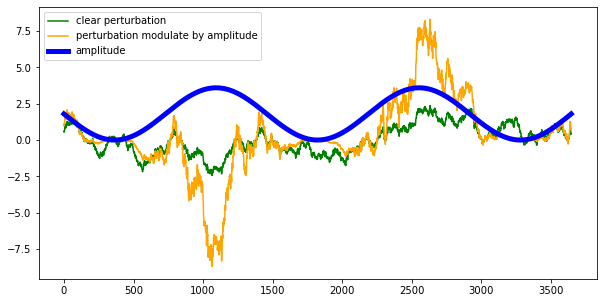

In [409]:
plt.figure(figsize=(10,5))

# clear perturbution
# from random walk
np.random.seed(13) 
perturbation = [0]
for j in range(len(series)-1):
    perturbation.append(perturbation[j] + np.random.normal()) 
perturbation=np.array(perturbation)

perturbation -= perturbation.mean()
perturbation /= np.std(perturbation)    

# from `series` 
# perturbation = np.fromiter(iter(d for i in range(12) for d in series[::-1 if i%2 else 1]), float)[:len(series_2)]

plt.figure(figsize=(10,5))
plt.plot(perturbation, 'g', label = 'clear perturbation')

#amplitude
levelOfPerturbution = 1.8# 
periodNumberOfPerturbution = 2.5
amplitude = (1 - np.sin(periodNumberOfPerturbution*(2*np.pi)*np.linspace(0,1,len(series))))*levelOfPerturbution

#periodic perturbation modulate by periodic amplitude
perturbation *= amplitude
plt.plot(perturbation, 'orange', label='perturbation modulate by amplitude')

plt.plot(amplitude, 'b', lw=5, label='amplitude')
plt.legend()

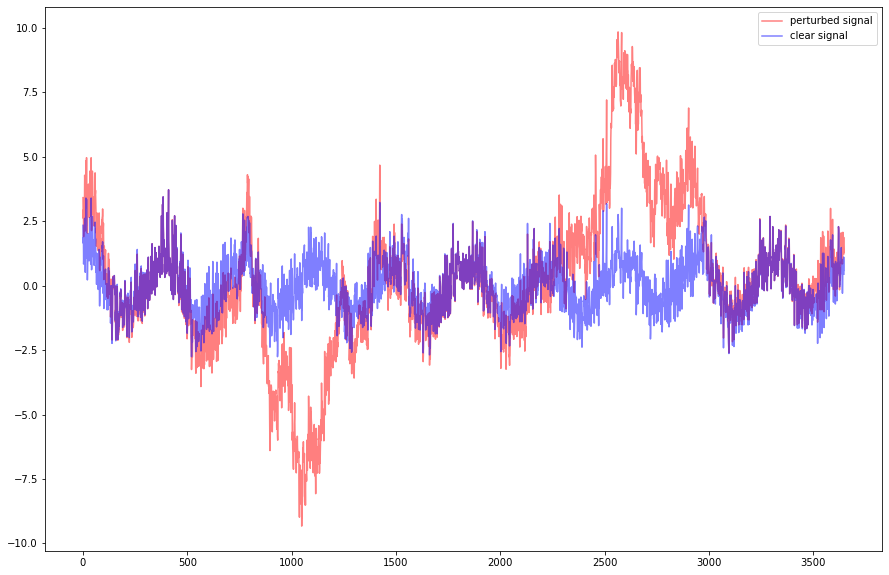

In [410]:
plt.figure(figsize=(15,10))
series_4 = series+perturbation
plt.plot(series_4, 'r', label='perturbed signal', alpha=0.5)
plt.plot(series, 'b', label='clear signal', alpha=0.5)
plt.legend()

/home/marsob/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04775D+00    |proj g|=  1.12133D-04

At iterate    5    f=  1.04775D+00    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     10      1     0     0   0.000D+00   1.048D+00
  F =   1.0477466074877650     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  1.00642D+00    |proj g|=  9.50129D-05

At iterate   10    f=  1.00642D+00    |proj g|=  7.32747D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     17      1     0     0   0.000D+00   1.006D+00
  F =   1.0064193902152725     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.91645D-01    |proj g|=  2.83840D-04


 This problem is unconstrained.



At iterate    5    f=  9.91643D-01    |proj g|=  7.09988D-04

At iterate   10    f=  9.91639D-01    |proj g|=  1.99785D-04

At iterate   15    f=  9.91639D-01    |proj g|=  1.99840D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   2.220D-08   9.916D-01
  F =  0.99163874665032736     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.82608D-01    |proj g|=  2.81875D-04


 This problem is unconstrained.



At iterate    5    f=  9.82607D-01    |proj g|=  5.98455D-04

At iterate   10    f=  9.82601D-01    |proj g|=  8.48099D-05

At iterate   15    f=  9.82600D-01    |proj g|=  1.90625D-04

At iterate   20    f=  9.82600D-01    |proj g|=  1.66533D-07

At iterate   25    f=  9.82600D-01    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     32      1     0     0   2.220D-08   9.826D-01
  F =  0.98259987440142538     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.77505D-01    |proj g|=  3.02336D-04

At iterate    5    f=  9.77504D-01    |proj g|=  5.14255D-04

At iterate   10    f=  9.77497D-01    |proj g|=  9.35807D-05

At iterate   15    f=  9.77495D-01    |proj g|=  1.86429D-04

At iterate   20    f=  9.77495D-01    |proj g|=  1.56541D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     26      1     0     0   3.331D-08   9.775D-01
  F =  0.97749521434463793     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.73483D-01    |proj g|=  3.01392D-04

At iterate    5    f=  9.73481D-01    |proj g|=  4.84823D-04

At iterate   10    f=  9.73473D-01    |proj g|=  9.23706D-05

At iterate   15    f=  9.73472D-01    |proj g|=  2.12508D-04

At iterate   20    f=  9.73471D-01    |proj g|=  2.62013D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     23     29      1     0     0   8.882D-08   9.735D-01
  F =  0.97347139276516570     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.70947D-01    |proj g|=  3.23663D-04

At iterate    5    f=  9.70945D-01    |proj g|=  3.82427D-04

At iterate   10    f=  9.70932D-01    |proj g|=  3.92930D-04

At iterate   15    f=  9.70932D-01    |proj g|=  4.43090D-05

At iterate   20    f=  9.70932D-01    |proj g|=  4.66294D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     22     29      1     0     0   7.772D-08   9.709D-01
  F =  0.97093163289553175     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.69833D-01    |proj g|=  4.13769D-04

At iterate    5    f=  9.69832D-01    |proj g|=  2.43960D-04

At iterate   10    f=  9.69819D-01    |proj g|=  7.21412D-04

At iterate   15    f=  9.69815D-01    |proj g|=  4.44111D-04

At iterate   20    f=  9.69812D-01    |proj g|=  6.60583D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     24     29      1     0     0   5.551D-08   9.698D-01
  F =  0.96981224377886566     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  9.69474D-01    |proj g|=  6.14753D-04

At iterate   10    f=  9.69462D-01    |proj g|=  1.33593D-04

At iterate   15    f=  9.69458D-01    |proj g|=  6.53533D-04

At iterate   20    f=  9.69454D-01    |proj g|=  3.88578D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     24     32      1     0     0   3.331D-08   9.695D-01
  F =  0.96945443317458690     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.68751D-01    |proj g|=  3.37930D-04

At iterate    5    f=  9.68749D-01    |proj g|=  2.43694D-04

At iterate   10    f=  9.68735D-01    |proj g|=  9.16223D-04

At iterate   15    f=  9.68729D-01    |proj g|=  2.75302D-04

At iterate   20    f=  9.68728D-01    |proj g|=  2.34257D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     22     26      1     0     0   2.220D-08   9.687D-01
  F =  0.96872802891005716     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  9.67899D-01    |proj g|=  2.29128D-04

At iterate   10    f=  9.67886D-01    |proj g|=  1.10848D-03

At iterate   15    f=  9.67879D-01    |proj g|=  4.50862D-05

At iterate   20    f=  9.67879D-01    |proj g|=  2.46803D-05

At iterate   25    f=  9.67879D-01    |proj g|=  7.77156D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     25     33      1     0     0   7.772D-08   9.679D-01
  F =  0.96787870965188183     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.67526D-01    |proj g|=  4.05753D-04

At iterate    5    f=  9.67523D-01    |proj g|=  2.59837D-04

At iterate   10    f=  9.67504D-01    |proj g|=  2.51599D-04

At iterate   15    f=  9.67502D-01    |proj g|=  2.26419D-04

At iterate   20    f=  9.67501D-01    |proj g|=  1.47660D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     24     29      1     0     0   7.772D-08   9.675D-01
  F =  0.96750105141098153     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  9.67465D-01    |proj g|=  3.67240D-04

At iterate   10    f=  9.67448D-01    |proj g|=  1.40565D-04

At iterate   15    f=  9.67443D-01    |proj g|=  7.40485D-04

At iterate   20    f=  9.67439D-01    |proj g|=  5.21805D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     23     26      1     0     0   2.220D-08   9.674D-01
  F =  0.96743916681797981     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.66929D-01    |proj g|=  1.14058D-03

At iterate    5    f=  9.66923D-01    |proj g|=  1.90459D-04

At iterate   10    f=  9.66912D-01    |proj g|=  8.50342D-04

At iterate   15    f=  9.66906D-01    |proj g|=  3.85691D-04

At iterate   20    f=  9.66890D-01    |proj g|=  5.84766D-04

At iterate   25    f=  9.66889D-01    |proj g|=  5.55112D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     26     31      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.66927D-01    |proj g|=  1.04137D-03

At iterate    5    f=  9.66921D-01    |proj g|=  2.89757D-04

At iterate   10    f=  9.66906D-01    |proj g|=  6.14742D-04

At iterate   15    f=  9.66902D-01    |proj g|=  5.56077D-04

At iterate   20    f=  9.66888D-01    |proj g|=  6.81788D-05

At iterate   25    f=  9.66888D-01    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     27     30      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  9.66719D-01    |proj g|=  2.19591D-04

At iterate   10    f=  9.66706D-01    |proj g|=  7.34535D-04

At iterate   15    f=  9.66701D-01    |proj g|=  4.28424D-04

At iterate   20    f=  9.66684D-01    |proj g|=  5.25191D-04

At iterate   25    f=  9.66683D-01    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     26     37      1     0     0   3.331D-08   9.667D-01
  F =  0.96668260657421157     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           12

 This problem is unconstrained.



At iterate    5    f=  9.66580D-01    |proj g|=  3.61455D-04

At iterate   10    f=  9.66564D-01    |proj g|=  5.12002D-04

At iterate   15    f=  9.66560D-01    |proj g|=  6.50491D-04

At iterate   20    f=  9.66537D-01    |proj g|=  4.38505D-04

At iterate   25    f=  9.66537D-01    |proj g|=  5.55112D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19     27     35      1     0     0   5.551D-08   9.665D-01
  F =  0.96653673347182367     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.66451D-01    |proj g|=  9.05143D-04

At iterate    5    f=  9.66443D-01    |proj g|=  4.31011D-04

At iterate   10    f=  9.66428D-01    |proj g|=  1.24700D-04

At iterate   15    f=  9.66423D-01    |proj g|=  5.44154D-04

At iterate   20    f=  9.66407D-01    |proj g|=  3.02536D-05

At iterate   25    f=  9.66407D-01    |proj g|=  6.66134D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20     27     32      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  9.66296D-01    |proj g|=  3.13372D-04

At iterate   10    f=  9.66280D-01    |proj g|=  2.83873D-04

At iterate   15    f=  9.66274D-01    |proj g|=  6.52267D-04

At iterate   20    f=  9.66260D-01    |proj g|=  2.57683D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     24     29      1     0     0   2.220D-08   9.663D-01
  F =  0.96625956222100695     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


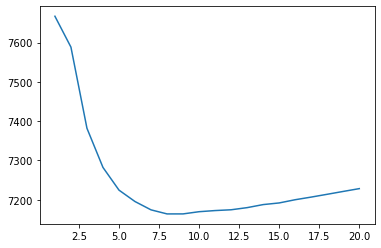

In [411]:
resultsAR_4 = []
for order in range(1,21):
    model = sm.tsa.ARMA(series_4, (order,0))
    resultsAR_4.append(model.fit())

bic_criteria_4 = [result.bic for result in resultsAR_4]

plt.plot(range(1,len(bic_criteria_4)+1),bic_criteria_4)

In [412]:
orderOfModel_4 = np.argmin(bic_criteria_4)+1
orderOfModel_4

8

In [413]:
# as the nature of case studied is known: series_4 is perturbed `series` with natural period equal 12 (in monthly scale),
# so instead of 11 for 'orderOfModel_4' I use 12
orderOfModel_4 = 12

In [414]:
# to compare the prediction results for different time series, the series is normalized 
series_4 -= series_4.mean()
series_4 /= np.std(series_4)

series_train_4, series_test_4 = train_test_split(series_4, test_size=0.20, random_state=42, shuffle=False)

df_train_4 = pd.DataFrame()
df_train_4['t'] = [x for x in series_train_4]
dataframe_train_4 = series_to_supervised(df_train_4, orderOfModel_4)
dataframe_train_4.head()

var1(t-12)  var1(t-11)  var1(t-10)  var1(t-9)  var1(t-8)  var1(t-7)  \
12    1.136123    0.852317    0.968382   0.596251   0.722772   0.789103   
13    0.852317    0.968382    0.596251   0.722772   0.789103   0.813879   
14    0.968382    0.596251    0.722772   0.789103   0.813879   1.019715   
15    0.596251    0.722772    0.789103   0.813879   1.019715   1.445996   
16    0.722772    0.789103    0.813879   1.019715   1.445996   1.359060   

    var1(t-6)  var1(t-5)  var1(t-4)  var1(t-3)  var1(t-2)  var1(t-1)   var1(t)  
12   0.813879   1.019715   1.445996   1.359060   0.971194   0.675329  0.908934  
13   1.019715   1.445996   1.359060   0.971194   0.675329   0.908934  1.354924  
14   1.445996   1.359060   0.971194   0.675329   0.908934   1.354924  1.647511  
15   1.359060   0.971194   0.675329   0.908934   1.354924   1.647511  1.312389  
16   0.971194   0.675329   0.908934   1.354924   1.647511   1.312389  1.316339

In [415]:
df_test_4 = pd.DataFrame()
df_test_4['t'] = [x for x in series_test_4]
dataframe_test_4 = series_to_supervised(df_test_4, orderOfModel_4)
dataframe_test_4.head()

var1(t-12)  var1(t-11)  var1(t-10)  var1(t-9)  var1(t-8)  var1(t-7)  \
12    1.510265    1.794613    1.913055   1.734064   1.152710   0.993451   
13    1.794613    1.913055    1.734064   1.152710   0.993451   1.258187   
14    1.913055    1.734064    1.152710   0.993451   1.258187   1.636101   
15    1.734064    1.152710    0.993451   1.258187   1.636101   1.669462   
16    1.152710    0.993451    1.258187   1.636101   1.669462   1.438304   

    var1(t-6)  var1(t-5)  var1(t-4)  var1(t-3)  var1(t-2)  var1(t-1)   var1(t)  
12   1.258187   1.636101   1.669462   1.438304   1.365911   1.461198  1.278213  
13   1.636101   1.669462   1.438304   1.365911   1.461198   1.278213  1.412957  
14   1.669462   1.438304   1.365911   1.461198   1.278213   1.412957  1.689561  
15   1.438304   1.365911   1.461198   1.278213   1.412957   1.689561  1.846298  
16   1.365911   1.461198   1.278213   1.412957   1.689561   1.846298  1.576240

In [416]:
# split into input and output
X_train_4, y_train_4 = dataframe_train_4.values[:,:-1], dataframe_train_4.values[:,-1]
X_test_4, y_test_4 = dataframe_test_4.values[:,:-1], dataframe_test_4.values[:,-1]

X_train_4.shape, y_train_4.shape, X_test_4.shape, y_test_4.shape

((2905, 12), (2905,), (718, 12), (718,))

In [417]:
models_4={}
grids_ElasticNet_4, grids_Lasso_4, grids_Ridge_4, grids_LinearR_4, grids_SVR_4 = {}, {}, {}, {}, {}

kfolds_4 = {'KFold_10':KFold(n_splits=10, shuffle=False), 'TimeSeriesSplit_9':TimeSeriesSplit(n_splits=9),
          'PrimitiveFold_9':PrimitiveFold(ratioTrainTest=9), 'RollingTSS_9' :RollingTimeSeriesSplit(n_splits=9)}

cv_name = list(kfolds_4.keys())[0]
kfold = kfolds_4[cv_name] 
print(f'kfold type used to find a reasonable set of hiperparameters : {cv_name}')


scoring = {'MSE': 'neg_mean_squared_error', 'RMSE': 'neg_root_mean_squared_error'}

kfold type used to find a reasonable set of hiperparameters : KFold_10


/tmp/ipykernel_27891/1029267037.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


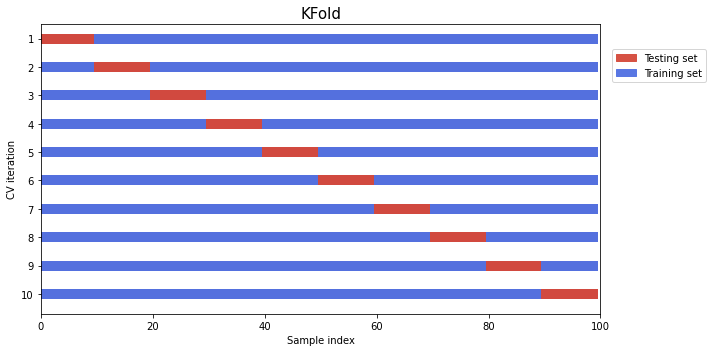

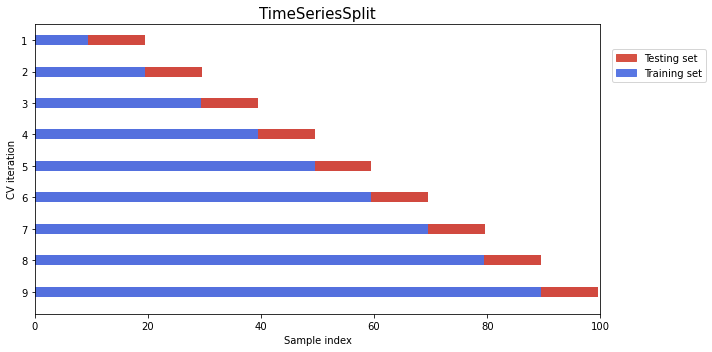

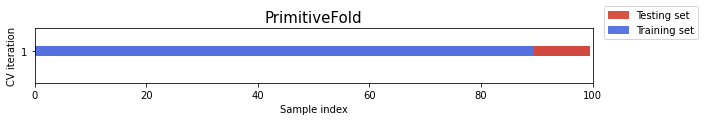

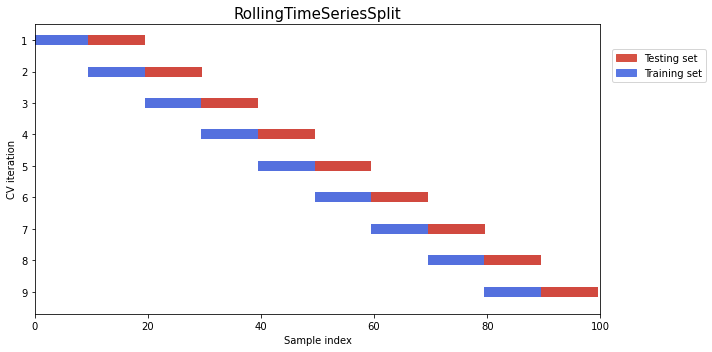

In [418]:
for name, kfold in kfolds_4.items():
    fig, ax = plt.subplots(figsize=(10, int(np.ceil(kfold.n_splits/2))))
    plotCvDiagram(kfold, ax)
    ax.legend([Patch(color=cmap_cv(0.9)), Patch(color=cmap_cv(.1))], ['Testing set', 'Training set'], loc=(1.02, .8))
    plt.tight_layout()
    #fig.subplots_adjust(right=.7)

In [ ]:
%%time
param_grid_ElasticNet_4 = {'polynomialfeatures__degree': [1, 2],
                                'elasticnet__alpha': np.linspace(0, 0.0625, 17),
                                'elasticnet__l1_ratio':np.linspace(0,0.250,17)
                        }
grids_ElasticNet_4[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), ElasticNet(alpha=1, tol=0.1)),
                    param_grid=param_grid_ElasticNet_4,
                    cv=kfold,
                    refit=False,
                    scoring=scoring)
grids_ElasticNet_4[cv_name].fit(X_train_4, y_train_4)

In [419]:
bestParamsForMethod = bestParamsForTimeSeriesObtainedByVariousApproaches(grids_ElasticNet_4[cv_name])
toCompareBestHiperparamsWithSetOfHiperparams(bestParamsForMethod, cv_name)
grids_ElasticNet_4[cv_name].param_grid

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.342003182075073, tolerance: 4.543610075737393
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.422324026961478, tolerance: 4.147309692560545
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estim

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.422324026961478, tolerance: 4.147309692560545
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estim

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_las

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.570966229210378, tolerance: 5.429994347494425
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estim

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.877927401036749, tolerance: 4.147309692560545
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.444999014769693, tolerance: 4.543610075737393
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.960434386759388, tolerance: 5.429994347494425
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_d

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.03582586476997, tolerance: 4.147309692560545
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.596375949251364, tolerance: 4.543610075737393
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.150869113543513, tolerance: 5.429994347494425
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_de

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.939692390751643, tolerance: 9.894117958208856
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.17771949524957, tolerance: 4.147309692560545
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.72908196479773, tolerance: 4.543610075737393
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_des

mean(MSE)
{'elasticnet__alpha': 0.0625, 'elasticnet__l1_ratio': 0.0, 'polynomialfeatures__degree': 1}
mean(RMSE)
{'elasticnet__alpha': 0.0625, 'elasticnet__l1_ratio': 0.0, 'polynomialfeatures__degree': 1}
harmonic_mean(MSE)
{'elasticnet__alpha': 0.0625, 'elasticnet__l1_ratio': 0.0, 'polynomialfeatures__degree': 1}
harmonic_mean(RMSE)
{'elasticnet__alpha': 0.0625, 'elasticnet__l1_ratio': 0.0, 'polynomialfeatures__degree': 1}
weighted_mean
{'elasticnet__alpha': 0.046875, 'elasticnet__l1_ratio': 0.25, 'polynomialfeatures__degree': 1}
CPU times: user 3min 2s, sys: 11.7 s, total: 3min 13s
Wall time: 24.3 s


{'polynomialfeatures__degree': [1, 2],
 'elasticnet__alpha': array([0.        , 0.00390625, 0.0078125 , 0.01171875, 0.015625  ,
        0.01953125, 0.0234375 , 0.02734375, 0.03125   , 0.03515625,
        0.0390625 , 0.04296875, 0.046875  , 0.05078125, 0.0546875 ,
        0.05859375, 0.0625    ]),
 'elasticnet__l1_ratio': array([0.      , 0.015625, 0.03125 , 0.046875, 0.0625  , 0.078125,
        0.09375 , 0.109375, 0.125   , 0.140625, 0.15625 , 0.171875,
        0.1875  , 0.203125, 0.21875 , 0.234375, 0.25    ])}

In [ ]:
%%time
param_grid_Lasso_4={'polynomialfeatures__degree': [1, 2],
            'lasso__alpha': np.linspace(0, 0.03, 51)
           }
grids_Lasso_4[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), Lasso(alpha=1, tol=0.1)),
                    param_grid=param_grid_Lasso_4,
                    cv=kfold,
                    refit=False,
                    scoring=scoring)
grids_Lasso_4[cv_name].fit(X_train_4, y_train_4)

In [420]:
bestParamsForMethod = bestParamsForTimeSeriesObtainedByVariousApproaches(grids_Lasso_4[cv_name])
toCompareBestHiperparamsWithSetOfHiperparams(bestParamsForMethod, cv_name)
grids_Lasso_4[cv_name].param_grid

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_d

mean(MSE)
{'lasso__alpha': 0.0006, 'polynomialfeatures__degree': 1}
mean(RMSE)
{'lasso__alpha': 0.011999999999999999, 'polynomialfeatures__degree': 1}
harmonic_mean(MSE)
{'lasso__alpha': 0.0162, 'polynomialfeatures__degree': 1}
harmonic_mean(RMSE)
{'lasso__alpha': 0.011999999999999999, 'polynomialfeatures__degree': 1}
weighted_mean
{'lasso__alpha': 0.0162, 'polynomialfeatures__degree': 1}
CPU times: user 28.7 s, sys: 1.87 s, total: 30.6 s
Wall time: 3.83 s


{'polynomialfeatures__degree': [1, 2],
 'lasso__alpha': array([0.    , 0.0006, 0.0012, 0.0018, 0.0024, 0.003 , 0.0036, 0.0042,
        0.0048, 0.0054, 0.006 , 0.0066, 0.0072, 0.0078, 0.0084, 0.009 ,
        0.0096, 0.0102, 0.0108, 0.0114, 0.012 , 0.0126, 0.0132, 0.0138,
        0.0144, 0.015 , 0.0156, 0.0162, 0.0168, 0.0174, 0.018 , 0.0186,
        0.0192, 0.0198, 0.0204, 0.021 , 0.0216, 0.0222, 0.0228, 0.0234,
        0.024 , 0.0246, 0.0252, 0.0258, 0.0264, 0.027 , 0.0276, 0.0282,
        0.0288, 0.0294, 0.03  ])}

In [ ]:
%%time
param_grid_Ridge_4 = {'polynomialfeatures__degree': [1, 2],
            'ridge__alpha':  np.linspace(5,25,41)
           }
grids_Ridge_4[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), Ridge(alpha=1, tol=0.1)),
                    param_grid=param_grid_Ridge_4,
                    cv=kfold,
                    refit=False,
                    scoring=scoring)
grids_Ridge_4[cv_name].fit(X_train_4, y_train_4)

In [421]:
bestParamsForMethod = bestParamsForTimeSeriesObtainedByVariousApproaches(grids_Ridge_4[cv_name])
toCompareBestHiperparamsWithSetOfHiperparams(bestParamsForMethod, cv_name)
grids_Ridge_4[cv_name].param_grid

mean(MSE)
{'polynomialfeatures__degree': 1, 'ridge__alpha': 5.0}
mean(RMSE)
{'polynomialfeatures__degree': 1, 'ridge__alpha': 5.0}
harmonic_mean(MSE)
{'polynomialfeatures__degree': 1, 'ridge__alpha': 5.0}
harmonic_mean(RMSE)
{'polynomialfeatures__degree': 1, 'ridge__alpha': 5.0}
weighted_mean
{'polynomialfeatures__degree': 1, 'ridge__alpha': 5.0}
CPU times: user 22.3 s, sys: 1.38 s, total: 23.7 s
Wall time: 2.96 s


{'polynomialfeatures__degree': [1, 2],
 'ridge__alpha': array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ,
        10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5,
        16. , 16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. ,
        21.5, 22. , 22.5, 23. , 23.5, 24. , 24.5, 25. ])}

In [ ]:
%%time
param_grid_LinearR_4 = {'polynomialfeatures__degree': [1, 2]}
grids_LinearR_4[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression()),
                    param_grid=param_grid_LinearR_4,
                    cv=kfold,
                    refit=False,
                    scoring=scoring)
grids_LinearR_4[cv_name].fit(X_train_4, y_train_4)

In [422]:
bestParamsForMethod = bestParamsForTimeSeriesObtainedByVariousApproaches(grids_LinearR_4[cv_name])
toCompareBestHiperparamsWithSetOfHiperparams(bestParamsForMethod, cv_name)
grids_LinearR_4[cv_name].param_grid

mean(MSE)
{'polynomialfeatures__degree': 1}
mean(RMSE)
{'polynomialfeatures__degree': 1}
harmonic_mean(MSE)
{'polynomialfeatures__degree': 1}
harmonic_mean(RMSE)
{'polynomialfeatures__degree': 1}
weighted_mean
{'polynomialfeatures__degree': 1}
CPU times: user 623 ms, sys: 27.4 ms, total: 651 ms
Wall time: 81.1 ms


{'polynomialfeatures__degree': [1, 2]}

In [ ]:
%%time
param_grid_SVR_4 = {"svr__C": np.linspace(100, 220, 31), 
                                "svr__gamma":np.linspace(0.00015, 0.00045, 31)}
grids_SVR_4[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), SVR(kernel='rbf', gamma=0.1)),
                    param_grid=param_grid_SVR_4,
                    cv=kfold,
                    refit=False,
                    scoring=scoring
                     )
grids_SVR_4[cv_name].fit(X_train_4, y_train_4)

In [423]:
bestParamsForMethod = bestParamsForTimeSeriesObtainedByVariousApproaches(grids_SVR_4[cv_name])
toCompareBestHiperparamsWithSetOfHiperparams(bestParamsForMethod, cv_name)
grids_SVR_4[cv_name].param_grid

mean(MSE)
{'svr__C': 120.0, 'svr__gamma': 0.00015}
mean(RMSE)
{'svr__C': 116.0, 'svr__gamma': 0.00015}
harmonic_mean(MSE)
{'svr__C': 116.0, 'svr__gamma': 0.00015}
harmonic_mean(RMSE)
{'svr__C': 116.0, 'svr__gamma': 0.00015}
weighted_mean
{'svr__C': 116.0, 'svr__gamma': 0.00015}
CPU times: user 1min 48s, sys: 79.4 ms, total: 1min 48s
Wall time: 1min 47s


{'svr__C': array([100., 104., 108., 112., 116., 120., 124., 128., 132., 136., 140.,
        144., 148., 152., 156., 160., 164., 168., 172., 176., 180., 184.,
        188., 192., 196., 200., 204., 208., 212., 216., 220.]),
 'svr__gamma': array([0.00015, 0.00016, 0.00017, 0.00018, 0.00019, 0.0002 , 0.00021,
        0.00022, 0.00023, 0.00024, 0.00025, 0.00026, 0.00027, 0.00028,
        0.00029, 0.0003 , 0.00031, 0.00032, 0.00033, 0.00034, 0.00035,
        0.00036, 0.00037, 0.00038, 0.00039, 0.0004 , 0.00041, 0.00042,
        0.00043, 0.00044, 0.00045])}

In [ ]:
# using calculated grids for a given cross-validation type and training data I creat best models
# from best hiperparams and refit it using training data.  
listOfGrids_method_4 = grids_ElasticNet_4, grids_Lasso_4, grids_Ridge_4, grids_LinearR_4, grids_SVR_4
refitModelsOfPointingCvTypeUsingListOfCalculatedGrids_method(models_4, cv_name, listOfGrids_method_4, X_train_4, y_train_4)

outcomeOfModelsPredictionForVariousApproaches(models_4, cv_name, X_test_4, y_test_4)

In [ ]:
%%time
for cv_name, kfold in list(kfolds_4.items())[1:]:
    grids_ElasticNet_4[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2),
                                                           ElasticNet(alpha=1, tol=0.1)),
                                             param_grid=param_grid_ElasticNet_4,
                                             cv=kfold,
                                             refit=False,
                                             scoring=scoring)
    grids_ElasticNet_4[cv_name].fit(X_train_4, y_train_4)
    
    grids_Lasso_4[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2),
                                                      Lasso(alpha=1, tol=0.1)),
                                        param_grid=param_grid_Lasso_4,
                                        cv=kfold,
                                        refit=False,
                                        scoring=scoring)
    grids_Lasso_4[cv_name].fit(X_train_4, y_train_4)
    
    grids_Ridge_4[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2),
                                                      Ridge(alpha=1, tol=0.1)),
                                        param_grid=param_grid_Ridge_4,
                                        cv=kfold,
                                        refit=False,
                                        scoring=scoring)
    grids_Ridge_4[cv_name].fit(X_train_4, y_train_4)
    
    grids_LinearR_4[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2),
                                                        LinearRegression()),
                                          param_grid=param_grid_LinearR_4,
                                          cv=kfold,
                                          refit=False,
                                          scoring=scoring)
    grids_LinearR_4[cv_name].fit(X_train_4, y_train_4)
    
    grids_SVR_4[cv_name] = GridSearchCV(make_pipeline(StandardScaler(), SVR(kernel='rbf', gamma=0.1)),
                                      param_grid=param_grid_SVR_4,
                                      cv=kfold,
                                      refit=False,
                                      scoring=scoring)
    grids_SVR_4[cv_name].fit(X_train_4, y_train_4)

listOfGrids_method_4 = grids_ElasticNet_4, grids_Lasso_4, grids_Ridge_4, grids_LinearR_4, grids_SVR_4

In [650]:
outcomes_4 = {}
for cv_name in kfolds_4:
    refitModelsOfPointingCvTypeUsingListOfCalculatedGrids_method(models_4, cv_name, listOfGrids_method_4, X_train_4, y_train_4)
    outcomes_4[cv_name] = outcomeOfModelsPredictionForVariousApproaches(models_4, cv_name, X_test_4, y_test_4)
    display(outcomes_4[cv_name])

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106.26320037574585, tolerance: 0.34674166908294385
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106.26320037574585, tolerance: 0.34674166908294385
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106.26320037574585, tolerance: 0.34674166908294385
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coo

KFold_10


Method        r2  explained_variance_score  \
0                   mean(MSE)_ElasticNet  0.772777                  0.772902   
1                  mean(RMSE)_ElasticNet  0.772777                  0.772902   
2          harmonic_mean(MSE)_ElasticNet  0.772777                  0.772902   
3         harmonic_mean(RMSE)_ElasticNet  0.772777                  0.772902   
4               weighted_mean_ElasticNet  0.782235                  0.782296   
5                        mean(MSE)_Lasso  0.791778                  0.791846   
6                       mean(RMSE)_Lasso  0.792081                  0.792113   
7               harmonic_mean(MSE)_Lasso  0.792321                  0.792343   
8              harmonic_mean(RMSE)_Lasso  0.792081                  0.792113   
9                    weighted_mean_Lasso  0.792321                  0.792343   
10                       mean(MSE)_Ridge  0.792121                  0.792195   
11                      mean(RMSE)_Ridge  0.792121                  0.792195   
12              harmonic_mean(MSE)_Ridge  0.792121                  0.792195   
13             harmonic_mean(RMSE)_Ridge  0.792121                  0.792195   
14                   weighted_mean_Ridge  0.792121                  0.792195   
15            mean(MSE)_LinearRegression  0.791962                  0.792034   
16           mean(RMSE)_LinearRegression  0.791962                  0.792034   
17   harmonic_mean(MSE)_LinearRegression  0.791962                  0.792034   
18  harmonic_mean(RMSE)_LinearRegression  0.791962                  0.792034   
19        weighted_mean_LinearRegression  0.791962                  0.792034   
20                         mean(MSE)_SVR  0.791578                  0.791618   
21                        mean(RMSE)_SVR  0.791597                  0.791636   
22                harmonic_mean(MSE)_SVR  0.791597                  0.791636   
23               harmonic_mean(RMSE)_SVR  0.791597                  0.791636   
24                     weighted_mean_SVR  0.791597                  0.791636   

    mean_squared_error  mean_absolute_error  
0             0.042782             0.162505  
1             0.042782             0.162505  
2             0.042782             0.162505  
3             0.042782             0.162505  
4             0.041001             0.158940  
5             0.039204             0.155546  
6             0.039147             0.155292  
7             0.039102             0.155175  
8             0.039147             0.155292  
9             0.039102             0.155175  
10            0.039140             0.155488  
11            0.039140             0.155488  
12            0.039140             0.155488  
13            0.039140             0.155488  
14            0.039140             0.155488  
15            0.039170             0.155574  
16            0.039170             0.155574  
17            0.039170             0.155574  
18            0.039170             0.155574  
19            0.039170             0.155574  
20            0.039242             0.155645  
21            0.039238             0.155646  
22            0.039238             0.155646  
23            0.039238             0.155646  
24            0.039238             0.155646

TimeSeriesSplit_9


Method        r2  explained_variance_score  \
0                   mean(MSE)_ElasticNet  0.783201                  0.783263   
1                  mean(RMSE)_ElasticNet  0.783201                  0.783263   
2          harmonic_mean(MSE)_ElasticNet  0.783201                  0.783263   
3         harmonic_mean(RMSE)_ElasticNet  0.783201                  0.783263   
4               weighted_mean_ElasticNet  0.783201                  0.783263   
5                        mean(MSE)_Lasso  0.792289                  0.792312   
6                       mean(RMSE)_Lasso  0.792289                  0.792312   
7               harmonic_mean(MSE)_Lasso  0.792289                  0.792312   
8              harmonic_mean(RMSE)_Lasso  0.792289                  0.792312   
9                    weighted_mean_Lasso  0.792289                  0.792312   
10                       mean(MSE)_Ridge  0.792121                  0.792195   
11                      mean(RMSE)_Ridge  0.792121                  0.792195   
12              harmonic_mean(MSE)_Ridge  0.792121                  0.792195   
13             harmonic_mean(RMSE)_Ridge  0.792121                  0.792195   
14                   weighted_mean_Ridge  0.792121                  0.792195   
15            mean(MSE)_LinearRegression  0.791962                  0.792034   
16           mean(RMSE)_LinearRegression  0.791962                  0.792034   
17   harmonic_mean(MSE)_LinearRegression  0.791962                  0.792034   
18  harmonic_mean(RMSE)_LinearRegression  0.791962                  0.792034   
19        weighted_mean_LinearRegression  0.791962                  0.792034   
20                         mean(MSE)_SVR  0.791647                  0.791713   
21                        mean(RMSE)_SVR  0.791647                  0.791713   
22                harmonic_mean(MSE)_SVR  0.791545                  0.791589   
23               harmonic_mean(RMSE)_SVR  0.791545                  0.791589   
24                     weighted_mean_SVR  0.791545                  0.791589   

    mean_squared_error  mean_absolute_error  
0             0.040819             0.158602  
1             0.040819             0.158602  
2             0.040819             0.158602  
3             0.040819             0.158602  
4             0.040819             0.158602  
5             0.039108             0.155191  
6             0.039108             0.155191  
7             0.039108             0.155191  
8             0.039108             0.155191  
9             0.039108             0.155191  
10            0.039140             0.155488  
11            0.039140             0.155488  
12            0.039140             0.155488  
13            0.039140             0.155488  
14            0.039140             0.155488  
15            0.039170             0.155574  
16            0.039170             0.155574  
17            0.039170             0.155574  
18            0.039170             0.155574  
19            0.039170             0.155574  
20            0.039229             0.155540  
21            0.039229             0.155540  
22            0.039248             0.155604  
23            0.039248             0.155604  
24            0.039248             0.155604

PrimitiveFold_9


Method        r2  explained_variance_score  \
0                   mean(MSE)_ElasticNet  0.779372                  0.779439   
1                  mean(RMSE)_ElasticNet  0.779372                  0.779439   
2          harmonic_mean(MSE)_ElasticNet  0.779372                  0.779439   
3         harmonic_mean(RMSE)_ElasticNet  0.779372                  0.779439   
4               weighted_mean_ElasticNet  0.779372                  0.779439   
5                        mean(MSE)_Lasso  0.792898                  0.792900   
6                       mean(RMSE)_Lasso  0.792898                  0.792900   
7               harmonic_mean(MSE)_Lasso  0.792898                  0.792900   
8              harmonic_mean(RMSE)_Lasso  0.792898                  0.792900   
9                    weighted_mean_Lasso  0.792898                  0.792900   
10                       mean(MSE)_Ridge  0.792051                  0.792127   
11                      mean(RMSE)_Ridge  0.792051                  0.792127   
12              harmonic_mean(MSE)_Ridge  0.792051                  0.792127   
13             harmonic_mean(RMSE)_Ridge  0.792051                  0.792127   
14                   weighted_mean_Ridge  0.792051                  0.792127   
15            mean(MSE)_LinearRegression  0.791962                  0.792034   
16           mean(RMSE)_LinearRegression  0.791962                  0.792034   
17   harmonic_mean(MSE)_LinearRegression  0.791962                  0.792034   
18  harmonic_mean(RMSE)_LinearRegression  0.791962                  0.792034   
19        weighted_mean_LinearRegression  0.791962                  0.792034   
20                         mean(MSE)_SVR  0.791401                  0.791460   
21                        mean(RMSE)_SVR  0.791401                  0.791460   
22                harmonic_mean(MSE)_SVR  0.791401                  0.791460   
23               harmonic_mean(RMSE)_SVR  0.791401                  0.791460   
24                     weighted_mean_SVR  0.791401                  0.791460   

    mean_squared_error  mean_absolute_error  
0             0.041540             0.159999  
1             0.041540             0.159999  
2             0.041540             0.159999  
3             0.041540             0.159999  
4             0.041540             0.159999  
5             0.038993             0.154907  
6             0.038993             0.154907  
7             0.038993             0.154907  
8             0.038993             0.154907  
9             0.038993             0.154907  
10            0.039153             0.155550  
11            0.039153             0.155550  
12            0.039153             0.155550  
13            0.039153             0.155550  
14            0.039153             0.155550  
15            0.039170             0.155574  
16            0.039170             0.155574  
17            0.039170             0.155574  
18            0.039170             0.155574  
19            0.039170             0.155574  
20            0.039275             0.155660  
21            0.039275             0.155660  
22            0.039275             0.155660  
23            0.039275             0.155660  
24            0.039275             0.155660

/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106.26320037574585, tolerance: 0.34674166908294385
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106.26320037574585, tolerance: 0.34674166908294385
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106.26320037574585, tolerance: 0.34674166908294385
  model = cd_fast.enet_coordinate_descent(
/home/marsob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coo

RollingTSS_9


Method        r2  explained_variance_score  \
0                   mean(MSE)_ElasticNet  0.772777                  0.772902   
1                  mean(RMSE)_ElasticNet  0.772777                  0.772902   
2          harmonic_mean(MSE)_ElasticNet  0.772777                  0.772902   
3         harmonic_mean(RMSE)_ElasticNet  0.772777                  0.772902   
4               weighted_mean_ElasticNet  0.782235                  0.782296   
5                        mean(MSE)_Lasso  0.791778                  0.791846   
6                       mean(RMSE)_Lasso  0.792081                  0.792113   
7               harmonic_mean(MSE)_Lasso  0.792321                  0.792343   
8              harmonic_mean(RMSE)_Lasso  0.792081                  0.792113   
9                    weighted_mean_Lasso  0.792321                  0.792343   
10                       mean(MSE)_Ridge  0.792121                  0.792195   
11                      mean(RMSE)_Ridge  0.792121                  0.792195   
12              harmonic_mean(MSE)_Ridge  0.792121                  0.792195   
13             harmonic_mean(RMSE)_Ridge  0.792121                  0.792195   
14                   weighted_mean_Ridge  0.792121                  0.792195   
15            mean(MSE)_LinearRegression  0.791962                  0.792034   
16           mean(RMSE)_LinearRegression  0.791962                  0.792034   
17   harmonic_mean(MSE)_LinearRegression  0.791962                  0.792034   
18  harmonic_mean(RMSE)_LinearRegression  0.791962                  0.792034   
19        weighted_mean_LinearRegression  0.791962                  0.792034   
20                         mean(MSE)_SVR  0.791578                  0.791618   
21                        mean(RMSE)_SVR  0.791597                  0.791636   
22                harmonic_mean(MSE)_SVR  0.791597                  0.791636   
23               harmonic_mean(RMSE)_SVR  0.791597                  0.791636   
24                     weighted_mean_SVR  0.791597                  0.791636   

    mean_squared_error  mean_absolute_error  
0             0.042782             0.162505  
1             0.042782             0.162505  
2             0.042782             0.162505  
3             0.042782             0.162505  
4             0.041001             0.158940  
5             0.039204             0.155546  
6             0.039147             0.155292  
7             0.039102             0.155175  
8             0.039147             0.155292  
9             0.039102             0.155175  
10            0.039140             0.155488  
11            0.039140             0.155488  
12            0.039140             0.155488  
13            0.039140             0.155488  
14            0.039140             0.155488  
15            0.039170             0.155574  
16            0.039170             0.155574  
17            0.039170             0.155574  
18            0.039170             0.155574  
19            0.039170             0.155574  
20            0.039242             0.155645  
21            0.039238             0.155646  
22            0.039238             0.155646  
23            0.039238             0.155646  
24            0.039238             0.155646